<center><font size="+4">Computational Economics 24/25</font></center>
<center><font size="+4">Andrea Vandin</font></center>
<center><font size="+2">LM in Economics</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><font size="+2">Università di Pisa, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20232024/raw/main/PDAI/jupyter/jupyterNotebooks/images/SSSA_LEMbeDS.png" width="700" alt="L'EMbeDS"></center>

<center><font size="+2">Classes by</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+4">Part 2</font></center>
<center><font size="+4">Classes 4-6: Advanced Libraries for</font></center>
<center><font size="+4">data manipulation/visualization</font></center>

---

# Preliminaries
## The role of this notebook in the course

In part 1 we briefly went through:
* How to program 
  * _Well_
  * Using the built-in Python data structures and functionalities
  * We have also seen some __best practices__ to follow when using python
    - Take a look at [this page](https://realpython.com/python-pep8/) for further __best practices__
* Applying the studied topics in 
  * simple assignments

<br/>
<br/>

The idea is that
  * Before knowing how to use advanced Python features, you need to know 
    - how to program
    - how to program in Python    
  * This is a more organic learning approach than showing how to solve specific tasks A or B
    * in the future you will have to learn how to solve new specific tasks... 
  * Now you have the necessary background to learn 
    - how to use __advanced libraries__ (to get more efficiency and/or to consider bigger problems)
        * Often it is just a matter of changing the command used, but the logics stays the same
    - new programming languages

<br/>
<br/>

__In parts 2 and 3 we will now unleash the power of Python!__
* We start from introducing popular Python libraries for data processing
* You can see this notebook as a first place to look at if you will need to use such libraries in the future.
  * It also contains examples and references to further material

## What is part 2 about

This notebook is mainly based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook introduces the libraries:
* [NumPy](https://numpy.org/): for scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * for working with structured data (CSV, Spreadsheets, Databases)
   * for creating advanced plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

Remember the scale of complexity of touched topics:
1. In part 1 we were doing primary school
1. In part 2 we are going to do high school
1. In part 3 we are going to do undergraduate studies

:D

---

# NumPy
NumPy, _Numerical Python_, is the Python package for __scientific computing__

It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

In [1]:
url_github_repo="https://github.com/EMbeDS-education/ComputationalEconomicsVandin20242025/raw/main/"


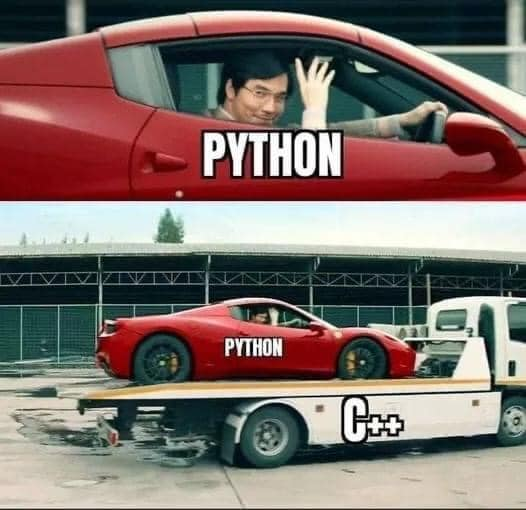

In [2]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/pythoncpp.jpg',width=600)
display(img)

## Install and import the NumPy module
The first time you run this notebook you might have to install 
- numpy (and later Pandas)

using the following script:

In [ ]:
#%pip install --upgrade pip
%pip install numpy
#!pip install numpy

After installing a module (only once), you should import it (everytime)
- The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [7]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange(4)`, we refer to `numpy.arange(4)`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing **vectorized arithmetic** operations and **broadcasting** capabilities
   * Vectorized arithmetic operations: 
     - Operations on arrays are done 
       - element-wise iterating over the elements of the arrays 
       - _at C level rather than at Python level_, obtaining better performances. 
     - We get a concise syntax
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In general, operations on arrays should be done on arrays with same _dimensions_
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

## The NumPy ndarray: A Multidimensional Array

### Performance comparison Numpy ndarrays vs Python lists

In [ ]:
l=[1,2,3]
l

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [ ]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))
np_arr
#py_list

Let's compute the square value of each element in the array/list

In [ ]:
 print("Test NumPy Array")
 %time np_arr_power = np_arr ** 2

 print("\nTest Python list comprehension")
 %time py_list = [x ** 2 for x in py_list]

 print("\nTest Python list iteration")
 %time for i in range(len(py_list)): py_list[i]=py_list[i]**2

 print("\nTests completed")

### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays

In [ ]:
#We have already imported numpy in a cell above
#import numpy as np

# Generate a 2x3 matrix with random data in the interval [0,1)
data = np.random.rand(2, 3)
data

In [ ]:
np.random.rand(2, 3) * 10 + 10

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 **each value** in `data`
* double **each value** in `data`

In [ ]:
data

In [ ]:
data * 10

In [ ]:
data + data

A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html). _More on this later_

In [ ]:
print(data.shape)
print(data.dtype)

### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the provided data

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
print(data1)
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

__Why do we get `6.` and not `6`?__

List of lists, e.g. representing a matrix,
* can be converted into a multidimensional array 
* if internal lists have same length

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [ ]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory
    - `stop` does not belong to the range
* Beware: 
  - `range` is an iterator that creates elements on demand
  - `arange` fully creates the array allocating all the necessary space
     - while python's `range` does not occupy much space

In [ ]:
np.ones((3, 6))+1

In [ ]:
print(np.arange(15))  #if you want integers
print(np.arange(15.)) #if you want reals
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

In [ ]:
np.arange(10,20,2)

### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision (or the larger interval) you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
print(arr1)
arr2 = np.array([1.1, 2.1, 3.1], dtype=np.int32)
print(arr2)
print(arr1.dtype)
print(arr2.dtype)

You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a `copy` of the original array, where elements have the new type

In [ ]:
arr = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
print(arr)
print('Before',arr.dtype,'\n')
int_arr = arr.astype(np.int32)
print(int_arr)
print('After ',int_arr.dtype)

### Vectorized Arithmetics with NumPy Arrays

Once you have values in an array
* You can easily apply operations on each of its elements
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number):
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* Similarly to list comprehensions, this does not require loops,
  * Note: as shown above, vectorized arithmetics is more efficient than the corresponding list comprehension operation (even more if compared to loops)

In [ ]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

> Note that with `a * a` we do not compute the product of 2 matrices. 
> - We multiply them element-wise

### Basic Indexing and Slicing

#### Indexing and slicing 1-dimensional arrays

Arrays have `indexing` and `slicing` capabilities of lists

In [ ]:
arr = np.arange(10)
print('arr',arr)
print('You can indexsingle entries:\narr[0] is',arr[0])
print('arr[5] is',arr[5])

In [ ]:
print('arr\n',arr)
print('You can create slices:')
print('arr[:8]  is\n',arr[:8])
print('arr[5:]  is\n          ',arr[5:])
print('arr[5:8] is\n          ',arr[5:8])
view58=arr[5:8]
view58

A slice is a sort of `view` of the array
* You can assign it to a variable
* You can change its values
  - The original array is changed as well!
* **Beware**: no data is copied

In [ ]:
arr

In [ ]:
arr[5:8] = 12
print('After arr[5:8] = 12 arr is\n',arr)

In [ ]:
my_view=arr[5:8] 
my_view[:] = 11
print('After arr is\n',arr)

Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or, again, _broadcasted_) to each selected element 

If you are familiar with Python lists you might have noticed an important difference
* When slicing a list, you actually create a copy 
* **Array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array
  
Let's see another example  

In [ ]:
arr

In [ ]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

In [ ]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345):\n', arr)

If you want a `copy of a slice of an ndarray` instead of a view, you will need to `explicitly copy` the array; 
* `arr2 = arr[5:8].copy()`

#### Indexing and slicing higher-dimensional arrays

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

In [ ]:
arr1d=arr2d[0]
arr1d

In [ ]:
arr1d[2]

As for multidimensional lists, you can access single elements of inner arrays using nested `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [ ]:
print(arr2d)
print(arr2d[0][2])
print(arr2d[0, 2])

**See figure below for an illustration of indexing a 2D array** <br />
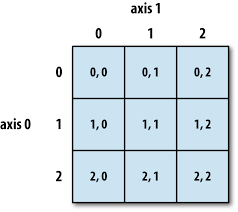

This is an example for 2-dimensional arrays
* It works similarly for higher dimensions...

**BEWARE**
- When __indexing__, it does not make a difference whether you use
  - `arr2d[0][2]` or `arr2d[0, 2]`
- When __silicing__, it makes a **big difference** whether you use
  - `arr2d[:2,1:]` or `arr2d[:2][1:]`
  - Typically what you want to do is `arr2d[:2,1:]`

For `arr2d[:2,1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- from these, we select column 1 and 2 `[2,3],[5,6]`

In [ ]:
arr2d

In [ ]:
print(arr2d[:2,1:])
arr2d[:2,1:].shape

For `arr2d[:2][1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- we select row 1 `[4, 5, 6]`

In [ ]:
print(arr2d[:2])
print()
print(arr2d[:2][1:])
arr2d[:2][1:].shape

Further examples of indexing/slicing of higher dimensional arrays

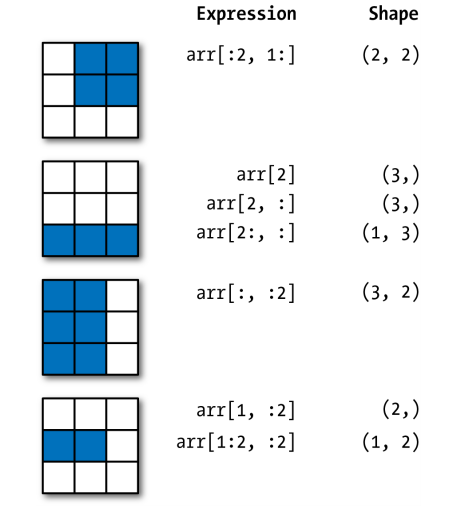

In [ ]:
print(arr2d)
print()
print(arr2d[:2])

We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [ ]:
arr2d[:2, 1:]

Assigning to a slice expression assigns to the whole selection by broadcasting

In [ ]:
arr2d

In [ ]:
arr2d[:2, 1:] = 0 
arr2d

### Select entries that satisfy a guard

We can also use a Boolean expression to select elements in an array
* we select the ones satisfying the Boolean expression

In [ ]:
data = np.random.randn(7, 4)
print('Data\n',data)

We first see how to create a _mask_

In [ ]:
data > 0

Now we use the mask to access the entries of interest

In [ ]:
data2=data[ data > 0 ]
print('Data2\n',data2)
data2.shape

In [ ]:
data[ data < 0 ] = 0
data

> This will actually _copy_ your data
> - You get a __new 1-dimensional array__ containing the elements matching the condition

In [ ]:
data2[0]=100
data

How can I get elements within an interval?
- Or, in general, that satisfy a complex condition?

In [ ]:
(data > 0) & (data < 0.5) 

In [ ]:
data3=data[ (data > 0) & (data < 0.5) ]
print('Data3\n',data3)
data3.shape

In [ ]:
my_view=(data > 0) & (data < 0.5) 
my_view.astype(np.int32)

## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Also in this case we compute views. 
  * **no data is actually copied**
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [ ]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

### Transposing Arrays
Arrays have the transpose method and also the special `T` attribute
* This is just a special reshape
* we compute a view - no actual copy

In [ ]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

When invoked on a matrix, they both give the transpose of such matrix
- See animation from [wikipedia](https://en.wikipedia.org/wiki/Transpose)

In [ ]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif")

In addition, `transpose` can be invoked on arrays of any dimensions [to permute such dimensions](https://numpy.org/devdocs/reference/generated/numpy.transpose.html#numpy.transpose)
- reversing them by default
- or providing the new order for dimensions in input

In [ ]:
x = np.ones((2, 3, 4))
print(x)
print('\nThe 3-D matrix has shape \n',x.shape)
print('Shape of x.transpose()\n',x.transpose().shape)
print('Shape of x.transpose(0,2,1)\n',x.transpose(0,2,1).shape)

### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` method
* not just multiplying element-wise their elements
* but the classic row-column multiplication of matrixes

In [ ]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print('m1\n',m1)
print('m2\n',m2)
print('m1.dot(m2)\n',m1.dot(m2))
print('Same as np.dot(m1,m2)\n',np.dot(m1,m2))

In [ ]:
m1 = np.arange(4).reshape(2,2)
m1

In [ ]:
m2 = (np.arange(4)+4).reshape(2,2)
m2

### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m1 ** 0.5

In [ ]:
print(np.sqrt(m1))
print(m1 ** 0.5)

### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
* can be computed by using the corresponding array method

In [ ]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [ ]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [ ]:
#Sample from the normal distribution
arr = np.random.randn(8)
arr

In [ ]:
arr.sort()
arr

Multidimensional arrays are sorted for one chosen dimension
E.g. in matrices we can
* Sort across rows
* Sort across columns

In [ ]:
arr2d = np.random.randn(5, 3)
arr2d_cp0 = arr2d.copy()
arr2d_cp1 = arr2d.copy()

print('Original')
print(arr2d)

print('\n`sort(0)`: Sort the elements within each column (sort across rows)')
arr2d_cp0.sort(axis=0)
print('arr2d.sort(0)')
print(arr2d_cp0)

print('\n`sort(1)`: Sort the elements within each row (sort across columns)')
arr2d_cp1.sort(1)
print('arr2d.sort(1)')
print(arr2d_cp1)

print('\n`sort( )`: Sorts across last axis  ( sort(1), sort across columns)')
arr2d.sort()
print('arr2d.sort()')
print(arr2d)

### Unique
NumPy has some basic set operations for 1-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [ ]:
names = np.array(['Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

## Logic functions 
- See also [here](https://numpy.org/doc/stable/reference/routines.logic.html)

We have seen how conditions can be checked on all elements in an array
- obtaining an array of same dimensions containing 
  - `True` for the elements satisfying the condition
  - `False` for the elements not satisfying the condition  

In [ ]:
data = np.random.randn(7, 4)
data

What numbers are greater than 0?

In [ ]:
mask = data > 0
print(mask.dtype)
print(mask.shape)
mask

NumPy offers __logic functions__ to check Boolean expressions on such Boolean arrays
- `any`: a generalization of **OR** returning `True` if at least one entry contains `True` 
- `all`: a generalization of **AND** returning `True` if at least one entry contains `True` 

As for the aggregation functions, these can be checked also on single dimensions

In [ ]:
print(mask)
print()
print()

# any( axis)
# Test whether any array element along a given axis evaluates to True.
print('\nmask.any()\n', mask.any() )
print('\nmask.any(axis=0) - for each column\n', mask.any(axis=0) )
print('\nmask.any(axis=1) - for each row\n', mask.any(axis=1) )
#all(axis)

print()
print()
#Test whether all array elements along a given axis evaluate to True.
print('\nmask.all()\n', mask.all() )
print('\nmask.all(axis=0) - for each column\n', mask.all(axis=0) )
print('\nmask.all(axis=1) - for each row\n', mask.all(axis=1) )

# Pandas

[Pandas](https://pandas.pydata.org/) is another popular Python package. 
* It is built on top of NumPy (its data structures consist of several arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with tabular data 
  - CSV files
  - Spreadsheets
  - Databases

E.g., Pandas allows to easily perform complex data manipulation on multi-dimensional data like 
* _reshape_ and _slice_
* data aggregations 
* data selection
* merge/join tables

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [ ]:
%pip install pandas

#import sys
#!"{sys.executable}" -m pip install pandas

In [ ]:
%pip install matplotlib

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [3]:
#import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like/array-like object containing __2 arrays__
* an ndarray containing the __actual data__
* an associated ndarray of __labels__ with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary (a hash-map)
* or, in its simplest form, as a 1-dimensional array/list consisting of
  * an array of data, 
  * an implicit array of labels. It labels each element with its position

In [2]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
type(obj)

pandas.core.series.Series

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained using the method `__str__` of the class Series


Since we did not specify an index
* a default array of labels containing integers from 0 to N - 1 is created.
* each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [4]:
print('Series index: ',obj.index)
print('Series values: ',obj.values, 'type:',type(obj.values))

Series index:  RangeIndex(start=0, stop=4, step=1)
Series values:  [ 4  7 -5  3] type: <class 'numpy.ndarray'>


Let's now create a Series whose entries are labelled by characters.

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
print('Series index: ',obj2.index,'type:',type(obj2.index))
print('Series values: ',obj2.values, 'type:',type(obj2.values))

Series index:  Index(['d', 'b', 'a', 'c'], dtype='object') type: <class 'pandas.core.indexes.base.Index'>
Series values:  [ 4  7 -5  3] type: <class 'numpy.ndarray'>


### Indexing, selection, and filtering

Similarly to Python [**dict**ionaries](https://docs.python.org/3/tutorial/datastructures.html), 
* you can use values in the index to select values in the main array

In [7]:
print("obj2['d'] = \n",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =\n",obj2['d'])

print('\nYou can also select a number of entries')
print("obj2[['c', 'a', 'd']] =")
print(obj2[ ['c', 'a', 'd'] ])

obj2['d'] = 
 4
obj2['d']  (after obj2['d'] = 6) =
 6

You can also select a number of entries
obj2[['c', 'a', 'd']] =
c    3
a   -5
d    6
dtype: int64


Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

What do you get with `obj2 > 0`?
- a copy of the series preserving the index, with `True`/`False` values

In [8]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [11]:
my_mask=obj2 > 0
my_mask

d     True
b     True
a    False
c     True
dtype: bool

In [12]:
import numpy as np

In [13]:
print("obj2")
print(obj2)
print()
print("NumPy operation obj2[obj2 > 0]")
print(obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2")
print(obj2 * 2)
print()
print("NumPy operation np.exp(obj2)")
print(np.exp(obj2))

obj2
d    6
b    7
a   -5
c    3
dtype: int64

NumPy operation obj2[obj2 > 0]
d    6
b    7
c    3
dtype: int64

NumPy operation obj2 * 2
d    12
b    14
a   -10
c     6
dtype: int64

NumPy operation np.exp(obj2)
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


### Create a series, and NaN

You can create a Series using 
- a **dict**ionary 

In [14]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj4 = pd.Series(sdata)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

If you are interested in specific indexes, you can use
- a **dict**ionary 
- and a list as indexes of interest

In [15]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
#states = ['Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:
- They make a mask!

In [16]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [17]:
pd.notnull(obj4) 

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

E.g., if you want to use only the non-null values you do:

In [18]:
obj4[pd.isnull(obj4)]

California   NaN
dtype: float64

In [21]:
obj4[pd.notnull(obj4)]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

## DataFrame
* A **Series** can be seen as 
  - a table with 1 column
  - a csv file with 1 column
  - an excel file with 1 column
  - ...
* A **DataFrame is a proper table/csv** with more columns
  * A Series is just a simpler version of a dataframe
  * A DataFrame is a series with 
    - **more main arrays** (one per column), and 
    - **one index**
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

> Most of the times, you will be loading data from external resources
> - local/remote CSV/excel files
> - queries on databases
> - webservices
> - ...
>
> Here we first show how to create one programmatically.

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

Essentially we _transpose_ the dictionary

In [27]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [28]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

state  pop nonExistingColumn
0    Ohio  1.5               NaN
1    Ohio  1.7               NaN
2    Ohio  3.6               NaN
3  Nevada  2.4               NaN
4  Nevada  2.9               NaN
5  Nevada  3.2               NaN

In [29]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              6 non-null      object 
 1   pop                6 non-null      float64
 2   nonExistingColumn  0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [30]:
frame.describe()

pop
count  6.000000
mean   2.550000
std    0.836062
min    1.500000
25%    1.875000
50%    2.650000
75%    3.125000
max    3.600000

If we don't specify columns of interest we load all of them

In [31]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [32]:
frame = pd.DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

We see above that the DataFrame also has an index/labels array
* the first column
  * in this case we have the default array of labels
  * but specific ones can be given explicitly

In [33]:
#frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1 = pd.DataFrame(data, index = ['o1','o2','o3','n1','n2','n3'] )
frame1

state  year  pop
o1    Ohio  2000  1.5
o2    Ohio  2001  1.7
o3    Ohio  2002  3.6
n1  Nevada  2001  2.4
n2  Nevada  2002  2.9
n3  Nevada  2003  3.2

A column of a DataFrame can be retrieved, obtaining a Series 
* by dict-like notation 
* or by attribute:

In [34]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [35]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [36]:
#Select single column or sequence of columns from the DataFrame
frame2[ 'state' ] # by dict-like notation 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [37]:
frame2.state # by attribute

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [ ]:

frame2[ ['state'] ]

In [38]:
frame2[['state','year']]

state  year
one      Ohio  2000
two      Ohio  2001
three    Ohio  2002
four   Nevada  2001
five   Nevada  2002
six    Nevada  2003

> Note the difference
> - `['state']` vs `.state`
<br/>
> They are both valid

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [39]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001 and 2000
* we are using a non-existing index 2003

In [40]:
pd.DataFrame(outer_dict, index=[2002, 2003])

Nevada  Ohio
2002     2.9   3.6
2003     NaN   NaN

Like Series, the `values` attribute 
- returns the data contained in the DataFrame as a 2D ndarray

In [41]:
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [42]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

By the way, do you remember what is nan? How can I handle it?

In [44]:
frame3.fillna(1)

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     1.0   1.5

In [46]:
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [48]:
frame3_NoNA=frame3.fillna(1)
frame3_NoNA

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     1.0   1.5

### Not-a-Number and column names

In [49]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [50]:
frameNaN = pd.DataFrame(data,columns=['state','pop','nonInitializedColumn'])
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

Can I get rid of NaN replacing them with a given value!?
   - Yes!

In [51]:
frameNaN.fillna(0)

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

> Beware: we create a new dataframe without modifying the original one

In [52]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

You can either
- Assign the result of fillna 
    - We are creating a new dataframe. 
    - This will NOT affect existing views of the dataframe
- Set parameter `inplace=True`
    - We are modifying the original dataframe. 
    - This will affect existing views of the dataframe

In [53]:
frameNaN_cp=frameNaN.fillna(0)
frameNaN_cp

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

In [54]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

In [55]:
frameNaN.fillna(0,inplace=True)
frameNaN

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

Well, 'nonInitializedColumn' is not a good name anymore :D
- Can I change the name of columns?
- **Yes!**

In [ ]:
frameNaN.columns=['state','pop','initializedColumn']
frameNaN

When replacing NaN, we might want to use default values depending on the data itself
> Replace all NaN with
> - the mean
> - the median

In [56]:
inner1 ={           2001: 2.4, 2002: 2.9, 2003: 10}
inner2 ={2000: 1.5, 2001: 1.7, 2002: 3.6, 2003: 12}

outer = {'Nevada': inner1, 'Ohio': inner2}
df = pd.DataFrame(outer)
df

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     NaN   1.5

In [57]:
df.fillna(1)

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     1.0   1.5

In [58]:
df.fillna(df.mean())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     5.1   1.5

In [59]:
df[ ['Nevada'] ].fillna(df[['Nevada']].mean())

Nevada
2001     2.4
2002     2.9
2003    10.0
2000     5.1

In [60]:
df.fillna(df.median())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     2.9   1.5

In [ ]:
#df.median(axis=1)

### Updating DataFrame objects

Values in a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is __broadcasted__ to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [61]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [62]:
frame2['debt'] = 16.5
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5

In [63]:
frame2.debt=1.0
frame2

year   state  pop  debt
one    2000    Ohio  1.5   1.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   1.0
four   2001  Nevada  2.4   1.0
five   2002  Nevada  2.9   1.0
six    2003  Nevada  3.2   1.0

When assigning lists or arrays to a column, 
- they must contain as many elements as rows in the DataFrame

In [64]:
frame2['debt'] = np.arange(6.)
#The following would not work
#frame2['debt'] = np.arange(7.)

frame2['debt'] = np.arange(6)

print(frame2)
frame2.dtypes

       year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     1
three  2002    Ohio  3.6     2
four   2001  Nevada  2.4     3
five   2002  Nevada  2.9     4
six    2003  Nevada  3.2     5


year       int64
state     object
pop      float64
debt       int64
dtype: object

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict. The drop methid deletes columns

In [ ]:
frame2

In [65]:
frame2['eastern'] =  (frame2.state == 'Ohio')
#frame2['eastern'] = True
frame2

year   state  pop  debt  eastern
one    2000    Ohio  1.5     0     True
two    2001    Ohio  1.7     1     True
three  2002    Ohio  3.6     2     True
four   2001  Nevada  2.4     3    False
five   2002  Nevada  2.9     4    False
six    2003  Nevada  3.2     5    False

> Note, you **cannot** create columns using the attribute notation
> * `frame2.easterntwo =  (frame2.state == 'Ohio')`
> * This would not work!

Deleting columns and rows
- `del` modifies the dataframe on which it is applied
- [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) has a number of useful attributes
  - can be used to delete columns or rows
  - creates a copy by default, but can also act on the current one
    * As for `fillna`, it depends on the parameter `inplace`!

In [ ]:
del frame2['eastern']
frame2

In [67]:
frame2['new_col']=np.arange(6)
print('frame2')
frame2

frame2


year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

In [69]:
frame2drop = frame2.drop(['new_col'],axis=1)
frame2drop
# print('\nframe2drop')
# print(frame2drop)
# print('\nframe2')
# print(frame2)

year   state  pop  debt  eastern
one    2000    Ohio  1.5     0     True
two    2001    Ohio  1.7     1     True
three  2002    Ohio  3.6     2     True
four   2001  Nevada  2.4     3    False
five   2002  Nevada  2.9     4    False
six    2003  Nevada  3.2     5    False

In [70]:
frame2

year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

> Drop can modify the current DataFrame if setting `inplace=True`

In [ ]:
frame2['new_col']=np.arange(6)
frame2
print('frame2')
print(frame2)

frame2.drop(['new_col'],axis=1,inplace=True)
print('\nframe2 after dropping new_col')
print(frame2)

If you try to drop a non-existing column
- E.g. you have already dropped it while reharsing before the class ;)
- You get an error. BUt you can ask to ignore such errors...

In [ ]:
#You get error
#frame2.drop(['new_col'],axis=1,inplace=True)

In [ ]:
#frame2.drop(['new_col'],axis=1,inplace=True) #deleting a non existing column gives errors
frame2.drop(['new_col'],axis=1,inplace=True,errors='ignore') #you can ignore errors

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method without specifying the `axis` (or using `axis=0`)

In [ ]:
frame2

In [ ]:
frame100 = frame2.drop(['five'])
frame100

In [ ]:
frame100['year']=100
frame100

In [ ]:
frame100.drop(['four','three'],inplace=True)
frame100

In [ ]:
frame2

Similarly to multi-dimensional arrays, 
* you can **transpose** a dataframe:

In [71]:
frame2

year   state  pop  debt  eastern  new_col
one    2000    Ohio  1.5     0     True        0
two    2001    Ohio  1.7     1     True        1
three  2002    Ohio  3.6     2     True        2
four   2001  Nevada  2.4     3    False        3
five   2002  Nevada  2.9     4    False        4
six    2003  Nevada  3.2     5    False        5

In [72]:
frame2.T

one   two three    four    five     six
year     2000  2001  2002    2001    2002    2003
state    Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop       1.5   1.7   3.6     2.4     2.9     3.2
debt        0     1     2       3       4       5
eastern  True  True  True   False   False   False
new_col     0     1     2       3       4       5

In [73]:
frame2.transpose()

one   two three    four    five     six
year     2000  2001  2002    2001    2002    2003
state    Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop       1.5   1.7   3.6     2.4     2.9     3.2
debt        0     1     2       3       4       5
eastern  True  True  True   False   False   False
new_col     0     1     2       3       4       5

As for array, no data is actually copied when transposing
* unless you specify it with attribute **copy**

> BEWARE: A copy will be always created if the dataframe contains __mixed dtypes__

In [ ]:
frame2

In [ ]:
frame2.dtypes

In [ ]:
frame2=frame2.astype({'year': 'int64'})
frame2.dtypes

> __ALERT: an almost 'bug' in pandas__

In [ ]:
#Given that we have strings, integers and flaots, a copy is done no matter what
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

In [ ]:
frame2=frame2.astype({'year': 'float64'})
frame2.dtypes

In [ ]:
frame2.drop(['state','eastern'],axis=1,inplace=True,errors='ignore')
frame2

In [ ]:
frame2.dtypes

We now have just floats. 
- Therefore a copy will be created only if required

In [ ]:
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

### Indexing, selection, and filtering


> Indexing and slicing work differently in DataFrames
> - __Indexing__ works on __columns__
> - __Slicing__ works on __rows__

Indexing into a DataFrame
- allows to retrieving one or more of its __columns__:

In [74]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [75]:
data['two'] #retrieving one column (a series)

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [76]:
data[ ['two'] ] #retrieving one column (a dataframe)

two
Ohio        1
Colorado    5
Utah        9
New York   13

In [77]:
data[['three', 'one']] #retrieving two columns (a dataframe)

three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12

If you select by slicing or Boolean expression, 
- it is interpreted as a selection on __rows__

In [78]:
data[:2] #rows by slicing 

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

In [79]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [80]:
data[ data['three'] > 5 ]  #rows by a boolean array

one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

#### Selection using iloc and loc

The `iloc` field of dataframes allows to select subsets of rows and columns using NumPy-like notation
* The iloc indexer for Dataframes is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`
   - column selection is optional
   - **a bit like selections with 2-dimensional arrays seen before**

In [81]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [82]:
data.iloc[1]   # second row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [83]:
data.iloc[-1]  # last row

one      12
two      13
three    14
four     15
Name: New York, dtype: int64

In [ ]:
data.iloc[:,1] # second column

In [84]:
data.iloc[:,-1] # last column

Ohio         3
Colorado     7
Utah        11
New York    15
Name: four, dtype: int64

Multiple row and column selections using iloc
- all rows   , first two columns, 
- last 2 rows, first two columns, 

In [85]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [86]:
data.iloc[:, :2] # all rows, first 2 columns

one  two
Ohio        0    1
Colorado    4    5
Utah        8    9
New York   12   13

In [87]:
data.iloc[2:, :2] # rows 2,3, first 2 columns

one  two
Utah        8    9
New York   12   13

In [88]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row,  4th 1st 2nd columns.

four  one  two
Colorado     7    4    5
Utah        11    8    9

The `loc` indexer works similarly
* but you use column/index names rather than positions
    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
* The loc indexer is used with the same syntax as iloc: `data.loc[row selection, column selection]`

> * `loc` gets rows (and/or columns) with particular **labels**
> * `iloc` gets rows (and/or columns) at integer **locations**

In [90]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [91]:
print("data.loc[['Colorado','Ohio']]")
data.loc[['Colorado','Ohio']] #List of labels index.

data.loc[['Colorado','Ohio']]


one  two  three  four
Colorado    4    5      6     7
Ohio        0    1      2     3

In [92]:
print()
print("data.loc[:,'one']")
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.


data.loc[:,'one']
Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

          one  four
Colorado    4     7
Ohio        0     3


In [93]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [94]:
data.loc['Colorado':'New York', 'two':]

two  three  four
Colorado    5      6     7
Utah        9     10    11
New York   13     14    15

### Arithmetics and Data Alignment
When summing 2 dataframes with different indexes or columns, we get a dataframe where
* Entries with column and index present in both dataframes have a proper value 
* The others have NaN

If you sum using method `add`
- `fill_value` can force a default value to be used when an entry exists only in one dataframe

This is known as __data alignment__

#### If not using `fill_value`, column-index must exist in both dataframes

In [95]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), 
                   columns=['a','b'],
                   index=['Texas', 'Colorado'])
df1

a    b
Texas     0.0  1.0
Colorado  2.0  3.0

In [96]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), 
                   columns=['a','b','c'],
                   index=['Texas'])
df2

a    b    c
Texas  4.0  5.0  6.0

In [97]:
df1 + df2

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

In [98]:
df1.add(df2)

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

#### If using `fill_value`, column-index must exist in one dataframe

In [99]:
df1.add(df2)

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

If you want to see **Colorado** in the result
- You can fill a **default value**

In [100]:
df_sum=df1.add(df2, fill_value=0)
df_sum

a    b    c
Colorado  2.0  3.0  NaN
Texas     4.0  6.0  6.0

In [101]:
df_sum.fillna(0)

a    b    c
Colorado  2.0  3.0  0.0
Texas     4.0  6.0  6.0

In [102]:
df1.add(df2, fill_value=100)

a      b      c
Colorado  102.0  103.0    NaN
Texas       4.0    6.0  106.0

> `Colorado,c` remains NA because it does not appear in any dataframe

### Function application and mapping

#### A digression on `lambda` functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

A lambda function that computes the sum of two numbers: 
- `lambda a, b: a+b`

Recall:
- Everything in python is an object, also (lambda) functions
  - You can assign them to variables
  - You can pass them as parameters

In [4]:
my_lfun = lambda a, b: a+b
print(type(my_lfun))
my_lfun(1,2)

<class 'function'>


3

In [5]:
def expression_evaluator(f,n1,n2):
    print('The result is',f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)
expression_evaluator(lambda a, b: a*b, 1,2)

The result is 3
The result is 2


A lambda function is really nothing more than a simple function without name
* Why should we use them then?
* Due to syntactic limiations regarding `def`

There are places where `def` cannot be used:
* In arguments of functions or in return statements
* We will see that we can ask Pandas to apply a lambda expression to a dataframe. This cannot be done with normal functions

Lambda expressions can help you avoiding annoying workarounds
* In the end, it is mostly syntactic sugar

#### A nerdish digression to read if interested

An interesing feature related to lambda functions are
- Python closurses to *attach data to code*

In [ ]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

In [ ]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [ ]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Some examples and interesting discussions on lambdas, map, filter, and reduce can be found at:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

Here we see how lambda functions allow to 
- _enrich_ the set of functions applicable to DataFrames
- apply _compactly_ complex functions to DataFrames

#### Function application and mapping
NumPy [ufuncs](https://www.w3schools.com/python/numpy_ufunc.asp) 
- element-wise array functions
- work fine also with pandas objects

For example
- `np.abs(frame)` applies element-wise `abs` to all values in the dataframe `frame`

In [8]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

b         d         e
Utah    1.692581  0.543911  1.016369
Ohio   -0.385650  1.122760  0.922297
Texas  -0.020688  0.252940  1.707019
Oregon  0.067271 -0.393286  1.255933

In [9]:
np.abs(frame)

b         d         e
Utah    1.692581  0.543911  1.016369
Ohio    0.385650  1.122760  0.922297
Texas   0.020688  0.252940  1.707019
Oregon  0.067271  0.393286  1.255933

But you can also `apply` any function thought for 1d arrays to each column or row.
- This gives you freedom in creating your own functions

In [ ]:
my_abs = lambda arr: arr.abs()
frame.apply(my_abs)

#my_abs2 = lambda arr: my_abs(arr)
#frame.apply(my_abs2)

In [ ]:
f = lambda arr: arr.abs() * 2 + 2
frame.apply(f)

Can I apply a function conditionally to the values in the dataframe?
- `frame.apply(f)` or `frame.apply(f,axis=0)`
  - You work on columns (can access and use single values by index)
- `frame.apply(f,axis=1)`
  - You work on rows (can access and use single values by column names)

In [10]:
frame

b         d         e
Utah    1.692581  0.543911  1.016369
Ohio   -0.385650  1.122760  0.922297
Texas  -0.020688  0.252940  1.707019
Oregon  0.067271 -0.393286  1.255933

In [11]:
# Double only columns where Texas is > 0
f = lambda arr: arr*2 if arr.Texas>0 else arr-100
frame.apply(f,axis=0) #same as axis="rows"

b         d         e
Utah    -98.307419  1.087823  2.032738
Ohio   -100.385650  2.245520  1.844594
Texas  -100.020688  0.505880  3.414038
Oregon  -99.932729 -0.786572  2.511866

In [ ]:
frame

In [12]:
# Double only rows where b is positive and e is negative
f = lambda arr: arr*2 if arr.d>0 and arr.e<0 else arr-100
frame.apply(f,axis=1) #same as axis="columns"

b           d          e
Utah    -98.307419  -99.456089 -98.983631
Ohio   -100.385650  -98.877240 -99.077703
Texas  -100.020688  -99.747060 -98.292981
Oregon  -99.932729 -100.393286 -98.744067

If the applied function aggregates an array into a value, you get a Series with
- an index per column
- the aggregated value of each column

As usual, you can use `axis` to work on rows rather than on columns

In [13]:
frame

b         d         e
Utah    1.692581  0.543911  1.016369
Ohio   -0.385650  1.122760  0.922297
Texas  -0.020688  0.252940  1.707019
Oregon  0.067271 -0.393286  1.255933

In [14]:
f = lambda arr: arr.max()
frame.apply(f)

b    1.692581
d    1.122760
e    1.707019
dtype: float64

In [15]:
frame.apply(f, axis='columns')

Utah      1.692581
Ohio      1.122760
Texas     1.707019
Oregon    1.255933
dtype: float64

Python functions for scalars (single values) rather than arrays (entire columns) can be used as well
- [`applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) applies a function that accepts and returns a scalar to every element of a DataFrame
- `map` can be used to obtain same result for series

In [16]:
frame

b         d         e
Utah    1.692581  0.543911  1.016369
Ohio   -0.385650  1.122760  0.922297
Texas  -0.020688  0.252940  1.707019
Oregon  0.067271 -0.393286  1.255933

In [17]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

/var/folders/3l/tn1dgncs4wj02y9fdy1nr4380000gn/T/ipykernel_44286/2654885570.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(times_ten)


b          d          e
Utah    16.925805   5.439113  10.163691
Ohio    -3.856501  11.227598   9.222970
Texas   -0.206877   2.529401  17.070191
Oregon   0.672713  -3.932859  12.559332

In [ ]:
frame['e'].map(times_ten)

In [18]:
frame[['e']].applymap(times_ten)

/var/folders/3l/tn1dgncs4wj02y9fdy1nr4380000gn/T/ipykernel_44286/1799287554.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame[['e']].applymap(times_ten)


e
Utah    10.163691
Ohio     9.222970
Texas   17.070191
Oregon  12.559332

### Sorting
To sort
lexicographically by row or column index, use the `sort_index` method, 
- which returns a new, sorted object:

In [19]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [20]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [21]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [22]:
frame.sort_index() # sorting by the index

c  a  b
one    6  7  8
three  0  1  2
two    3  4  5

In [23]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

c  b  a
three  0  2  1
two    3  5  4
one    6  8  7

We saw how to sort according to the 'name' of the index or of the column

If you want to **sort according to the values** in the dataframe you should use
- [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [24]:
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [25]:
frame.sort_values(by='b',ascending=False)

c  a  b
one    6  7  8
two    3  4  5
three  0  1  2

### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [26]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [27]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [28]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [29]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

idxmin and idxmax return:
* the index containing the minimum or maximum values

In [30]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [31]:
df.idxmax()

one    b
two    d
dtype: object

In [32]:
df['one'].idxmax()

'b'

In [33]:
df.loc[df['one'].idxmax()]

one    7.1
two   -4.5
Name: b, dtype: float64

In [ ]:
df.idxmin()

The method `describe` computes a number of summary statistics in one shot:

In [34]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 268.0+ bytes


 ### Value Counts, Membership and Missing Data
 Another class of related methods extracts information about the values contained in a
one-dimensional Series. 

In [36]:
df = pd.DataFrame([['a', 'b'], [np.nan, 'a'],
                   ['b', 'b'], ['a', 'b']],
                  index=[1,2,3,4],
                  columns=['one', 'two'])

df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [37]:
df.two.unique() # unique, which gives you an array of the unique values in a Series

array(['b', 'a'], dtype=object)

In [38]:
df.two.value_counts() # computes a Series containing value frequencies:

two
b    3
a    1
Name: count, dtype: int64

In [ ]:
#df.value_counts()

`isin` is responsible for 
- vectorized set membership 

In [39]:
df.one

1      a
2    NaN
3      b
4      a
Name: one, dtype: object

In [40]:
df.one.isin(['b', 'a'])

1     True
2    False
3     True
4     True
Name: one, dtype: bool

In [41]:
df.one[df.one.isin(['b', 'a'])]

1    a
3    b
4    a
Name: one, dtype: object

In [42]:
df.one[df.one.isin(['b'])]

3    b
Name: one, dtype: object

In certain cases, you might want to **filter out missing data**
- As we have seen, you can use [`fillna`](https://www.w3resource.com/pandas/dataframe/dataframe-fillna.php) 
    - to fill NaN values with a given one
    - this creates a copy of the dataframe!
- You can use [`dropna`](https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php) 
    - to drop rows with at least one NaN
    - Or columns with at least one NaN using `dropna(axis='columns')`
    - this creates a copy of the dataframe!    

In [43]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [44]:
df.fillna(0)

one two
1   a   b
2   0   a
3   b   b
4   a   b

In [ ]:
#df['one']=df.one.fillna(0)

In [ ]:
df

In [ ]:
df

In [45]:
df.dropna()

one two
1   a   b
3   b   b
4   a   b

In [ ]:
df

In [ ]:
df.dropna(axis='columns')

###  Bin values into discrete intervals

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis.

Pandas supports these approaches using the cut and qcut function:
 * [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html): Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.
 * [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html): Discretize variable into equal-sized buckets, based on sample quantiles

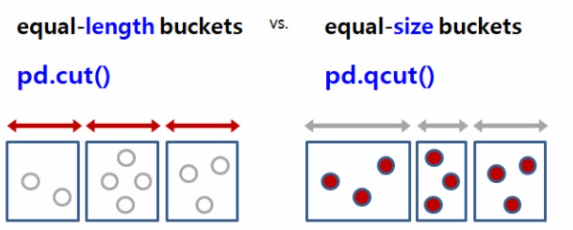

In [46]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/binning.PNG',width=500)
display(img)

In [52]:
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

In [53]:
df_age = pd.DataFrame({'Age': np.random.normal(30, 2, 1000) })
df_age
df_age.sort_values(by='Age')

Age
799  23.862728
744  24.631156
282  25.072324
803  25.375812
240  25.431344
..         ...
143  35.283897
266  35.484421
437  35.488934
710  35.538337
599  35.785089

[1000 rows x 1 columns]

> `cut` somehow corresponds to histograms...

Text(0, 0.5, 'Frequency')

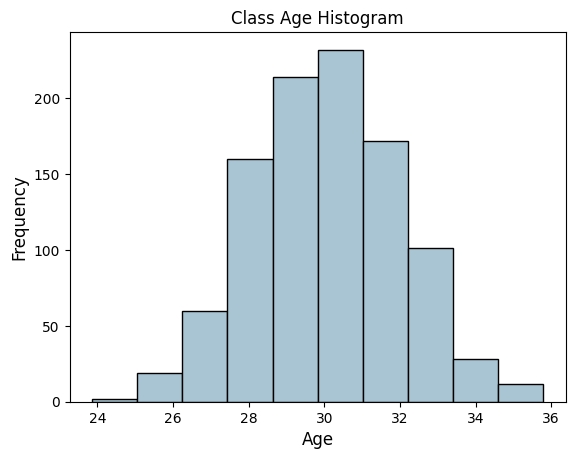

In [54]:
fig, ax = plt.subplots()
df_age['Age'].hist(bins=10, color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Class Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [55]:
df_age

Age
0    27.313787
1    31.036967
2    31.142842
3    31.104974
4    28.863723
..         ...
995  29.725461
996  30.461741
997  30.197633
998  29.163333
999  29.638061

[1000 rows x 1 columns]

In [56]:
print("cut")
df_age['bucket_cut'] = pd.cut(df_age.Age, 3) 
print(df_age['bucket_cut'].value_counts())# .plot(kind='bar')

print("\nqcut")
df_age['bucket_qcut'] = pd.qcut(df_age.Age, 3) 
print(df_age['bucket_qcut'].value_counts())# .plot(kind='bar')

cut
bucket_cut
(27.837, 31.811]    683
(31.811, 35.785]    194
(23.851, 27.837]    123
Name: count, dtype: int64

qcut
bucket_qcut
(23.862, 29.204]    334
(29.204, 30.914]    333
(30.914, 35.785]    333
Name: count, dtype: int64


In [57]:
df_age

Age        bucket_cut       bucket_qcut
0    27.313787  (23.851, 27.837]  (23.862, 29.204]
1    31.036967  (27.837, 31.811]  (30.914, 35.785]
2    31.142842  (27.837, 31.811]  (30.914, 35.785]
3    31.104974  (27.837, 31.811]  (30.914, 35.785]
4    28.863723  (27.837, 31.811]  (23.862, 29.204]
..         ...               ...               ...
995  29.725461  (27.837, 31.811]  (29.204, 30.914]
996  30.461741  (27.837, 31.811]  (29.204, 30.914]
997  30.197633  (27.837, 31.811]  (29.204, 30.914]
998  29.163333  (27.837, 31.811]  (23.862, 29.204]
999  29.638061  (27.837, 31.811]  (29.204, 30.914]

[1000 rows x 3 columns]

In [58]:
df_age

Age        bucket_cut       bucket_qcut
0    27.313787  (23.851, 27.837]  (23.862, 29.204]
1    31.036967  (27.837, 31.811]  (30.914, 35.785]
2    31.142842  (27.837, 31.811]  (30.914, 35.785]
3    31.104974  (27.837, 31.811]  (30.914, 35.785]
4    28.863723  (27.837, 31.811]  (23.862, 29.204]
..         ...               ...               ...
995  29.725461  (27.837, 31.811]  (29.204, 30.914]
996  30.461741  (27.837, 31.811]  (29.204, 30.914]
997  30.197633  (27.837, 31.811]  (29.204, 30.914]
998  29.163333  (27.837, 31.811]  (23.862, 29.204]
999  29.638061  (27.837, 31.811]  (29.204, 30.914]

[1000 rows x 3 columns]

bucket_q
PhD Student    683
Post-Doc       194
Student        123
Name: count, dtype: int64


<Axes: xlabel='bucket_q'>

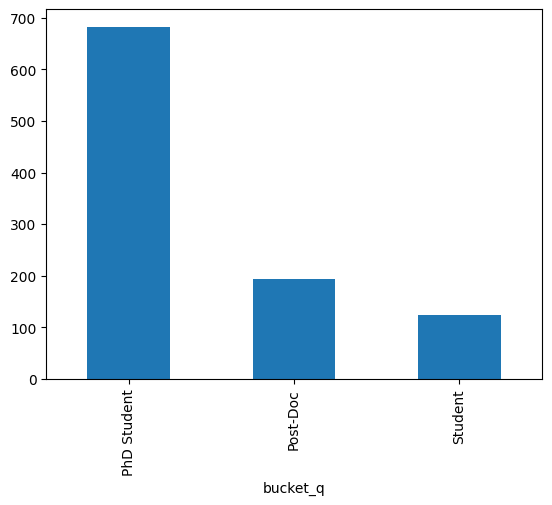

In [59]:
df_age['bucket_q'] = pd.cut(df_age.Age, 3,  labels=["Student", "PhD Student", "Post-Doc"]) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')
df_age['bucket_q'].value_counts().plot(kind='bar')

In [60]:
df_age

Age        bucket_cut       bucket_qcut     bucket_q
0    27.313787  (23.851, 27.837]  (23.862, 29.204]      Student
1    31.036967  (27.837, 31.811]  (30.914, 35.785]  PhD Student
2    31.142842  (27.837, 31.811]  (30.914, 35.785]  PhD Student
3    31.104974  (27.837, 31.811]  (30.914, 35.785]  PhD Student
4    28.863723  (27.837, 31.811]  (23.862, 29.204]  PhD Student
..         ...               ...               ...          ...
995  29.725461  (27.837, 31.811]  (29.204, 30.914]  PhD Student
996  30.461741  (27.837, 31.811]  (29.204, 30.914]  PhD Student
997  30.197633  (27.837, 31.811]  (29.204, 30.914]  PhD Student
998  29.163333  (27.837, 31.811]  (23.862, 29.204]  PhD Student
999  29.638061  (27.837, 31.811]  (29.204, 30.914]  PhD Student

[1000 rows x 4 columns]

In [61]:
df_age[['Age','bucket_q']].sort_values(by='Age')

Age  bucket_q
799  23.862728   Student
744  24.631156   Student
282  25.072324   Student
803  25.375812   Student
240  25.431344   Student
..         ...       ...
143  35.283897  Post-Doc
266  35.484421  Post-Doc
437  35.488934  Post-Doc
710  35.538337  Post-Doc
599  35.785089  Post-Doc

[1000 rows x 2 columns]

In [62]:
 pd.cut(df_age.Age, [10,20,30,40]).value_counts()

Age
(30, 40]    505
(20, 30]    495
(10, 20]      0
Name: count, dtype: int64

### Concatenate, Merge, Join
Sometimes we don't have just 1 dataframe, 
- but more that we want to combine in different ways

Pandas provides various facilities for easily combining together DataFrames

#### Concatenating Along an Axis
If we have dataframes representing _chunks_ of data with same structure 
- e.g., sets of rows of a table
- we can use `concat` to concatenate their rows
  - many more options [exist](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [63]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
 

frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

Note, you might need to sort the resulting dataframe

In [64]:
frames = [df2, df1, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [65]:
result.sort_index()

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

What if some rows have same index?
- You get more rows with same index! 

In [66]:
frames = [df2, df2]
result = pd.concat(frames, axis=0)
result

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [67]:
result.loc[4]

A   B   C   D
4  A4  B4  C4  D4
4  A4  B4  C4  D4

If you want to avoid this:
- Reset the index afterwards `result.reset_index()`
- Change the index of one of the two before concatenating

But, in general, we suggest to use `concat` only if this case does not arise.
> Indeed, it is useful to split first a big dtaframe, working on the single parts and putting them back together

In [68]:
result_reset=result.reset_index()
result_reset

index   A   B   C   D
0      4  A4  B4  C4  D4
1      5  A5  B5  C5  D5
2      6  A6  B6  C6  D6
3      7  A7  B7  C7  D7
4      4  A4  B4  C4  D4
5      5  A5  B5  C5  D5
6      6  A6  B6  C6  D6
7      7  A7  B7  C7  D7

You might also be interested in dropping duplicate rows (i.e., with same values apart from index)

In [69]:
result_reset.drop_duplicates()

index   A   B   C   D
0      4  A4  B4  C4  D4
1      5  A5  B5  C5  D5
2      6  A6  B6  C6  D6
3      7  A7  B7  C7  D7

Thanks to __data alignment__, you can also concatenate dataframe with 
- __not perfectly matching structure__

In [70]:
df2['E']= ['E8', 'E9', 'E10', 'E11']
df2.drop(['D'],axis=1,inplace=True,errors='ignore')
df2

A   B   C    E
4  A4  B4  C4   E8
5  A5  B5  C5   E9
6  A6  B6  C6  E10
7  A7  B7  C7  E11

In [71]:
df1

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [72]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D    E
0    A0   B0   C0   D0  NaN
1    A1   B1   C1   D1  NaN
2    A2   B2   C2   D2  NaN
3    A3   B3   C3   D3  NaN
4    A4   B4   C4  NaN   E8
5    A5   B5   C5  NaN   E9
6    A6   B6   C6  NaN  E10
7    A7   B7   C7  NaN  E11
8    A8   B8   C8   D8  NaN
9    A9   B9   C9   D9  NaN
10  A10  B10  C10  D10  NaN
11  A11  B11  C11  D11  NaN

#### Database-style merging and joining

Dimensions in combining dataframes
- `concat` combines dataframes _vertically_
   - we put together _rows_
   - but we can also add columns specifying `axis`
- [`merge` and `join`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) combine dataframes _horizontally_
   - we put together _columns_   
   
Some examples below were taken from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

##### Merge

`Merge` operations combine datasets by 
- Linking rows using one or more keys (i.e. columns).
- These operations are central to relational databases. 
  - After all, dataframes are tables ...

Let's look at an example of `merge`

In [73]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K0', 'K2', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [74]:
right

key   C   D
0  K0  C0  D0
1  K0  C1  D1
2  K2  C2  D2
3  K2  C3  D3

We note that
- K0 and K2 appear in both dataframes
- K1 and K3 appear only in left

We want to obtain a dataframe with columns `key` and `A` to `D`, combining rows 
- with same value of `key`

In [76]:
pd.merge(left, right,  how='inner', on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K0  A0  B0  C1  D1
2  K2  A2  B2  C2  D2
3  K2  A2  B2  C3  D3

In [77]:
pd.merge(left, right,  how='outer', on='key')

key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K0  A0  B0   C1   D1
2  K1  A1  B1  NaN  NaN
3  K2  A2  B2   C2   D2
4  K2  A2  B2   C3   D3
5  K3  A3  B3  NaN  NaN

In [78]:
pd.merge(left, right,  how='left', on='key')

key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K0  A0  B0   C1   D1
2  K1  A1  B1  NaN  NaN
3  K2  A2  B2   C2   D2
4  K2  A2  B2   C3   D3
5  K3  A3  B3  NaN  NaN

- The _how_ argument determines which keys are to be included in the resulting table

|  Merge method |Description  |
|---|---|
|  left |  Use keys from left frame only |  
|  right |  Use keys from right frame only |  
|  outer |  Use union of keys from both frames |  
|  inner (default) | Use intersection of keys from both frames  |  


Instead, _on_ specifies the Column to join on. 
- This must appear in both combined DataFrames

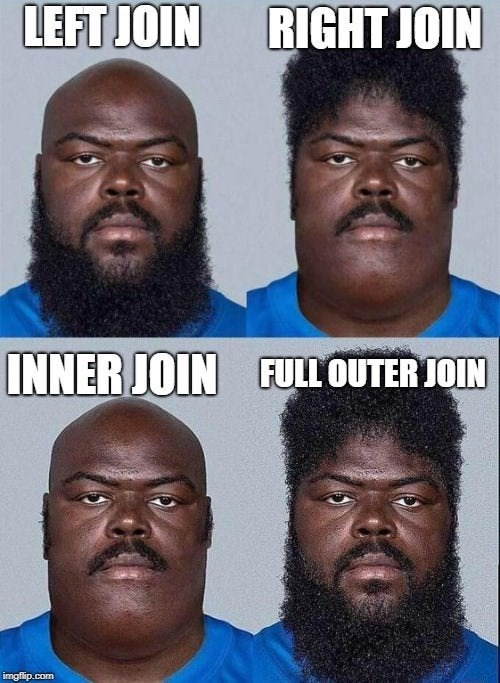

In [75]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/join.jpeg',width=500)
display(img)

What if you want to ignore certain columns? 

In [ ]:
pd.merge(left, right,  how='inner', on='key')

In [ ]:
right

In [ ]:
pd.merge(left, right[['key','C']],  how='inner', on='key')

##### Join

Pandas exposes another method for applying merge-like operations
- **join**

Both `merge` and `join` are based on a common inner method.
- join could be useful in [specific cases](https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas)

# Load/manipulate remote CSV file: Simple application to Italian COVID data

In [79]:
import numpy as np
import pandas as pd

Using Python and pandas, it is easy to read data from CSV files

One convenient feature is __type inference__
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort. 

Let us consider the national-level Italian COVID CSV data collected by Protezione civile
* It is distributed as a CSV file in a [GitHub repository](https://github.com/pcm-dpc/COVID-19/)
* You also find a local copy downloaded on 26/01/2021 in our wiki (follow the link dataset from the right-menu)

Let's read one such _remote_ CSV file into a DataFrame
* __You just need 1 instruction__

In [80]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')


In [81]:
covid_data

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0     2020-02-24T18:00:00   ITA                     101                 26   
1     2020-02-25T18:00:00   ITA                     114                 35   
2     2020-02-26T18:00:00   ITA                     128                 36   
3     2020-02-27T18:00:00   ITA                     248                 56   
4     2020-02-28T18:00:00   ITA                     345                 64   
...                   ...   ...                     ...                ...   
1328  2023-10-14T17:00:00   ITA                    3566                115   
1329  2023-10-15T17:00:00   ITA                    3563                111   
1330  2023-10-16T17:00:00   ITA                    3631                125   
1331  2023-10-17T17:00:00   ITA                    3609                127   
1332  2023-10-18T17:00:00   ITA                    3551                119   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                      127                      94              221   
1                      150                     162              311   
2                      164                     221              385   
3                      304                     284              588   
4                      409                     412              821   
...                    ...                     ...              ...   
1328                  3681                  163607           167288   
1329                  3674                  163539           167213   
1330                  3756                  161593           165349   
1331                  3736                  160890           164626   
1332                  3670                  160344           164014   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
0                              0             221                1  ...   
1                             90              93                1  ...   
2                             74              78                3  ...   
3                            203             250               45  ...   
4                            233             238               46  ...   
...                          ...             ...              ...  ...   
1328                         157            4851         25825233  ...   
1329                         -75            3153         25828446  ...   
1330                       -1864            2324         25832606  ...   
1331                        -723            7577         25840862  ...   
1332                        -612            4581         25846029  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
0          4324           NaN   NaN                         NaN        NaN   
1          8623           NaN   NaN                         NaN        NaN   
2          9587           NaN   NaN                         NaN        NaN   
3         12014           NaN   NaN                         NaN        NaN   
4         15695           NaN   NaN                         NaN        NaN   
...         ...           ...   ...                         ...        ...   
1328  276366648    69438850.0   NaN                         9.0        NaN   
1329  276388163    69442117.0   NaN                         5.0        NaN   
1330  276403605    69444712.0   NaN                        22.0        NaN   
1331  276458853    69451092.0   NaN                        22.0        NaN   
1332  276498458    69456321.0   NaN                         6.0        NaN   

      note_casi totale_positivi_test_molecolare  \
0           NaN                             NaN   
1           NaN                             NaN   
2           NaN                             NaN   
3           NaN                             NaN   
4           NaN                             NaN   
...         ...                             ...   
1328        NaN                       9839634.0 

In [82]:
covid_data.head(10)

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0  2020-02-24T18:00:00   ITA                     101                 26   
1  2020-02-25T18:00:00   ITA                     114                 35   
2  2020-02-26T18:00:00   ITA                     128                 36   
3  2020-02-27T18:00:00   ITA                     248                 56   
4  2020-02-28T18:00:00   ITA                     345                 64   
5  2020-02-29T18:00:00   ITA                     401                105   
6  2020-03-01T18:00:00   ITA                     639                140   
7  2020-03-02T18:00:00   ITA                     742                166   
8  2020-03-03T18:00:00   ITA                    1034                229   
9  2020-03-04T18:00:00   ITA                    1346                295   

   totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                   127                      94              221   
1                   150                     162              311   
2                   164                     221              385   
3                   304                     284              588   
4                   409                     412              821   
5                   506                     543             1049   
6                   779                     798             1577   
7                   908                     927             1835   
8                  1263                    1000             2263   
9                  1641                    1065             2706   

   variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  tamponi  \
0                           0             221                1  ...     4324   
1                          90              93                1  ...     8623   
2                          74              78                3  ...     9587   
3                         203             250               45  ...    12014   
4                         233             238               46  ...    15695   
5                         228             240               50  ...    18661   
6                         528             566               83  ...    21127   
7                         258             342              149  ...    23345   
8                         428             466              160  ...    25856   
9                         443             587              276  ...    29837   

   casi_testati  note  ingressi_terapia_intensiva  note_test  note_casi  \
0           NaN   NaN                         NaN        NaN        NaN   
1           NaN   NaN                         NaN        NaN        NaN   
2           NaN   NaN                         NaN        NaN        NaN   
3           NaN   NaN                         NaN        NaN        NaN   
4           NaN   NaN                         NaN        NaN        NaN   
5           NaN   NaN                         NaN        NaN        NaN   
6           NaN   NaN                         NaN        NaN        NaN   
7           NaN   NaN                         NaN        NaN        NaN   
8           NaN   NaN                         NaN        NaN        NaN   
9           NaN   NaN                         NaN        NaN        NaN   

  totale_positivi_test_molecolare  totale_positivi_test_antigenico_rapido  \
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                             NaN                                     NaN   
5                             NaN                                     NaN   
6                             NaN                                     NaN   
7                             NaN                                     NaN   
8                             NaN          

In [83]:
covid_data.tail()

data stato  ricoverati_con_sintomi  terapia_intensiva  \
1328  2023-10-14T17:00:00   ITA                    3566                115   
1329  2023-10-15T17:00:00   ITA                    3563                111   
1330  2023-10-16T17:00:00   ITA                    3631                125   
1331  2023-10-17T17:00:00   ITA                    3609                127   
1332  2023-10-18T17:00:00   ITA                    3551                119   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1328                  3681                  163607           167288   
1329                  3674                  163539           167213   
1330                  3756                  161593           165349   
1331                  3736                  160890           164626   
1332                  3670                  160344           164014   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
1328                         157            4851         25825233  ...   
1329                         -75            3153         25828446  ...   
1330                       -1864            2324         25832606  ...   
1331                        -723            7577         25840862  ...   
1332                        -612            4581         25846029  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
1328  276366648    69438850.0   NaN                         9.0        NaN   
1329  276388163    69442117.0   NaN                         5.0        NaN   
1330  276403605    69444712.0   NaN                        22.0        NaN   
1331  276458853    69451092.0   NaN                        22.0        NaN   
1332  276498458    69456321.0   NaN                         6.0        NaN   

      note_casi totale_positivi_test_molecolare  \
1328        NaN                       9839634.0   
1329        NaN                       9840118.0   
1330        NaN                       9840513.0   
1331        NaN                       9841842.0   
1332        NaN                       9842522.0   

      totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
1328                              16344985.0              102351652.0   
1329                              16347654.0              102357407.0   
1330                              16349583.0              102358981.0   
1331                              16355831.0              102364924.0   
1332                              16359731.0              102370718.0   

      tamponi_test_antigenico_rapido  
1328                     174014996.0  
1329                     174030756.0  
1330                     174044624.0  
1331                     174093929.0  
1332                     174127740.0  

[5 rows x 24 columns]

In [84]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    1333 non-null   object 
 1   stato                                   1333 non-null   object 
 2   ricoverati_con_sintomi                  1333 non-null   int64  
 3   terapia_intensiva                       1333 non-null   int64  
 4   totale_ospedalizzati                    1333 non-null   int64  
 5   isolamento_domiciliare                  1333 non-null   int64  
 6   totale_positivi                         1333 non-null   int64  
 7   variazione_totale_positivi              1333 non-null   int64  
 8   nuovi_positivi                          1333 non-null   int64  
 9   dimessi_guariti                         1333 non-null   int64  
 10  deceduti                                1333 non-null   int6

In [85]:
covid_data.describe()

ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
count             1333.000000        1333.000000           1333.000000   
mean              8739.432858         829.815454           9569.249062   
std               8452.585539        1059.421108           9470.070710   
min                101.000000          18.000000            127.000000   
25%               2627.000000         142.000000           2816.000000   
50%               5342.000000         337.000000           5759.000000   
75%              10925.000000        1037.000000          11558.000000   
max              34697.000000        4068.000000          38507.000000   

       isolamento_domiciliare  totale_positivi  variazione_totale_positivi  \
count            1.333000e+03     1.333000e+03                 1333.000000   
mean             4.124903e+05     4.220596e+05                  122.875469   
std              4.863475e+05     4.899620e+05                18977.821172   
min              9.400000e+01     2.210000e+02              -116092.000000   
25%              9.951400e+04     1.069620e+05                -3801.000000   
50%              1.838390e+05     1.884530e+05                 -136.000000   
75%              5.346110e+05     5.613080e+05                 1854.000000   
max              2.713594e+06     2.734906e+06               172462.000000   

       nuovi_positivi  dimessi_guariti       deceduti  \
count     1333.000000     1.333000e+03    1333.000000   
mean     19429.631658     1.135121e+07  127888.219805   
std      30955.224243     1.029418e+07   59393.980605   
min         78.000000     1.000000e+00       7.000000   
25%       2070.000000     1.855127e+06   84674.000000   
50%       6761.000000     4.916068e+06  135931.000000   
75%      23243.000000     2.344759e+07  180679.000000   
max     220532.000000     2.584603e+07  192210.000000   

       casi_da_sospetto_diagnostico  ...   totale_casi       tamponi  \
count                    162.000000  ...  1.333000e+03  1.333000e+03   
mean                  345928.216049  ...  1.190116e+07  1.422998e+08   
std                   217856.889628  ...  1.039152e+07  1.067001e+08   
min                        0.000000  ...  2.290000e+02  4.324000e+03   
25%                   223237.500000  ...  2.441854e+06  3.043149e+07   
50%                   236256.500000  ...  5.436143e+06  1.315578e+08   
75%                   341673.000000  ...  2.409921e+07  2.561393e+08   
max                   988470.000000  ...  2.620225e+07  2.764985e+08   

       casi_testati  ingressi_terapia_intensiva  note_test  note_casi  \
count  1.278000e+03                 1050.000000        0.0        0.0   
mean   4.183589e+07                   53.437143        NaN        NaN   
std    2.405211e+07                   62.888892        NaN        NaN   
min    9.353100e+05                    0.000000        NaN        NaN   
25%    2.005070e+07                   12.250000        NaN        NaN   
50%    4.443500e+07                   29.000000        NaN        NaN   
75%    6.614592e+07                   57.000000        NaN        NaN   
max    6.945632e+07                  324.000000        NaN        NaN   

       totale_positivi_test_molecolare  \
count                     1.007000e+03   
mean                      7.386642e+06   
std                       2.595697e+06   
min                       2.351466e+06   
25%                       4.481763e+06   
50%                       8.763295e+06   
75%                       9.723222e+06   
max                       1.036965e+07   

       totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
count                            1.007000e+03             1.007000e+03   
mean                             8.186076e+06             8.061409e+07   
std                              6.871924e+06             2.311728e+07   
min                              9.570000e+02             2.861735e+07   
25%                              1.700380e+05             5.949369e

In [86]:
covid_data['data']

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1328    2023-10-14T17:00:00
1329    2023-10-15T17:00:00
1330    2023-10-16T17:00:00
1331    2023-10-17T17:00:00
1332    2023-10-18T17:00:00
Name: data, Length: 1333, dtype: object

In [88]:
covid_data[ ['data','terapia_intensiva'] ]

data  terapia_intensiva
0     2020-02-24T18:00:00                 26
1     2020-02-25T18:00:00                 35
2     2020-02-26T18:00:00                 36
3     2020-02-27T18:00:00                 56
4     2020-02-28T18:00:00                 64
...                   ...                ...
1328  2023-10-14T17:00:00                115
1329  2023-10-15T17:00:00                111
1330  2023-10-16T17:00:00                125
1331  2023-10-17T17:00:00                127
1332  2023-10-18T17:00:00                119

[1333 rows x 2 columns]

<Axes: >

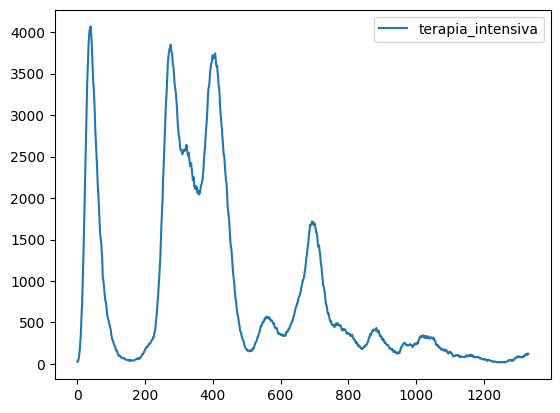

In [89]:
covid_data[ ['data','terapia_intensiva'] ].plot()

In [90]:
covid_data.data

0       2020-02-24T18:00:00
1       2020-02-25T18:00:00
2       2020-02-26T18:00:00
3       2020-02-27T18:00:00
4       2020-02-28T18:00:00
               ...         
1328    2023-10-14T17:00:00
1329    2023-10-15T17:00:00
1330    2023-10-16T17:00:00
1331    2023-10-17T17:00:00
1332    2023-10-18T17:00:00
Name: data, Length: 1333, dtype: object

In [91]:
covid_data.iloc[0]

data                                      2020-02-24T18:00:00
stato                                                     ITA
ricoverati_con_sintomi                                    101
terapia_intensiva                                          26
totale_ospedalizzati                                      127
isolamento_domiciliare                                     94
totale_positivi                                           221
variazione_totale_positivi                                  0
nuovi_positivi                                            221
dimessi_guariti                                             1
deceduti                                                    7
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                               229
tamponi                                                  4324
casi_testati                                              NaN
note    

In [92]:
covid_data.iloc[-1]

data                                      2023-10-18T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                   3551
terapia_intensiva                                         119
totale_ospedalizzati                                     3670
isolamento_domiciliare                                 160344
totale_positivi                                        164014
variazione_totale_positivi                               -612
nuovi_positivi                                           4581
dimessi_guariti                                      25846029
deceduti                                               192210
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                          26202253
tamponi                                             276498458
casi_testati                                       69456321.0
note    

In [94]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
print(type(last_day))
print(last_day)

<class 'str'>
2023-10-18T17:00:00


Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [96]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_regions_last_day

0       False
1       False
2       False
3       False
4       False
        ...  
1328    False
1329    False
1330    False
1331    False
1332     True
Name: data, Length: 1333, dtype: bool


data stato  ricoverati_con_sintomi  terapia_intensiva  \
1332  2023-10-18T17:00:00   ITA                    3551                119   

      totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
1332                  3670                  160344           164014   

      variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
1332                        -612            4581         25846029  ...   

        tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
1332  276498458    69456321.0   NaN                         6.0        NaN   

      note_casi totale_positivi_test_molecolare  \
1332        NaN                       9842522.0   

      totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
1332                              16359731.0              102370718.0   

      tamponi_test_antigenico_rapido  
1332                     174127740.0  

[1 rows x 24 columns]

In [ ]:
cov_regions_last_day.to_csv('covid_lastday.csv')

Or, more compactly

In [ ]:
covid_data[covid_data.data == covid_data['data'].iloc[-1]].to_csv('covid_lastday_b.csv')

In [97]:
covid_data[covid_data['ricoverati_con_sintomi'] > 10000].to_csv('covid_more_than_10k.csv')

In [98]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].to_csv('covid_more_than_25k.csv')

# Plot dataframes: Simple application to Yahoo! Finance stock prices - %change, correlation
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

## Install required libraries

In [ ]:
## install Yahoo! Finance market data downloader for Pandas
%pip install -U pandas_datareader #convenient package for accessing online data (mostly finance-related)
# %pip install matplotlib #'the' pyhton package for creating plots 
%pip install -U Jinja2 # Helps formatting strings with HTML and CSS.
%pip install yfinance

In [103]:
import pandas_datareader.data as web

#A workaround to fix recent issues in the service (problems since december 2022)
import yfinance as yfin
yfin.pdr_override()

# Visualizzation libs
#keeps the plots in one place. calls image as static pngs
#%matplotlib inline 
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

import pandas as pd

## Download data

In [104]:
web.get_data_yahoo('IBM',"2004-08-19","2023-02-01")

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19   81.022942   81.596558   80.736137   81.156792   46.552113   
2004-08-20   80.803062   81.500954   80.803062   81.500954   46.749527   
2004-08-23   81.481834   81.692162   80.927345   80.927345   46.420490   
2004-08-24   81.261948   81.405357   80.640533   80.984703   46.453400   
2004-08-25   81.261948   81.520073   80.831741   81.328873   46.650814   
...                ...         ...         ...         ...         ...   
2023-01-25  140.470001  141.029999  139.360001  140.759995  135.620743   
2023-01-26  137.529999  138.270004  132.979996  134.449997  129.541138   
2023-01-27  134.440002  135.490005  133.770004  134.389999  129.483337   
2023-01-30  134.320007  136.110001  133.979996  135.300003  130.360092   
2023-01-31  135.500000  135.649994  133.759995  134.729996  129.810913   

              Volume  
Date                  
2004-08-19   4920907  
2004-08-20   4708464  
2004-08-23   4456588  
2004-08-24   2835078  
2004-08-25   4608258  
...              ...  
2023-01-25   7347500  
2023-01-26  17548500  
2023-01-27   8143100  
2023-01-30   5375700  
2023-01-31   7206400  

[4645 rows x 6 columns]

Do you know dictionary comprehensions?

In [105]:
#https://finance.yahoo.com/quote/AAPL/history?period1=1467770400&period2=1625536799&interval=1d&frequency=1d&filter=history&guccounter=1&guce_referrer=aHR0cDovL2xvY2FsaG9zdDo4ODg4Lw&guce_referrer_sig=AQAAAByrNT-HvDMWtenDoAglNPRKNaphvEwT3rMevHGT-mKwGMlw5NvAj3GlaBn1ztprmTfT4vIDwdzHgXvFpe72e3ISW5I0FoYRmSqR1SzvVcwg8VmpqbFpYQn8lMZqSHSkhru9c3-fOHLDo5dWLBUiR9iqs0kLoNADVPIfhXtw72_x
all_data = { ticker: web.get_data_yahoo(ticker,"2004-08-19","2023-02-01")
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-08-19    0.562679    0.568929    0.542143    0.548393    0.465474   
2004-08-20    0.548393    0.553393    0.544464    0.550000    0.466838   
2004-08-23    0.551071    0.558393    0.546429    0.555000    0.471082   
2004-08-24    0.558214    0.570536    0.556964    0.570536    0.484269   
2004-08-25    0.569107    0.591964    0.566607    0.590179    0.500942   
...                ...         ...         ...         ...         ...   
2023-01-25  140.889999  142.429993  138.809998  141.860001  141.257339   
2023-01-26  143.169998  144.250000  141.899994  143.960007  143.348419   
2023-01-27  143.160004  147.229996  143.080002  145.929993  145.310043   
2023-01-30  144.960007  145.550003  142.850006  143.000000  142.392487   
2023-01-31  142.699997  144.339996  142.279999  144.289993  143.677002   

               Volume  
Date                   
2004-08-19  388920000  
2004-08-20  316780800  
2004-08-23  254660000  
2004-08-24  374136000  
2004-08-25  505618400  
...               ...  
2023-01-25   65799300  
2023-01-26   54105100  
2023-01-27   70555800  
2023-01-30   64015300  
2023-01-31   65874500  

[4645 rows x 6 columns]

## Extract and combine data of interest

In [ ]:
all_data.keys()

In [ ]:
all_data['AAPL']

In [ ]:
all_data['IBM']

In [ ]:
dictionary = {ticker: data['Adj Close'] for ticker, data in all_data.items()}
dictionary

Let us collect only the [_adjusted stock price_](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) for each company

In [107]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.head()


AAPL        IBM       MSFT      GOOG
Date                                                
2004-08-19  0.465474  46.552120  16.996538  2.499133
2004-08-20  0.466838  46.749531  17.046677  2.697639
2004-08-23  0.471082  46.420506  17.122099  2.724787
2004-08-24  0.484269  46.453403  17.122099  2.611960
2004-08-25  0.500942  46.650822  17.316956  2.640104

In [108]:
price.tail()

AAPL         IBM        MSFT        GOOG
Date                                                      
2023-01-25  141.257339  135.620758  238.979355   96.730003
2023-01-26  143.348419  129.541138  246.319275   99.160004
2023-01-27  145.310043  129.483337  246.478195  100.709999
2023-01-30  142.392487  130.360092  241.065125   97.949997
2023-01-31  143.677002  129.810898  246.130554   99.870003

In [109]:
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4645 entries, 2004-08-19 to 2023-01-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4645 non-null   float64
 1   IBM     4645 non-null   float64
 2   MSFT    4645 non-null   float64
 3   GOOG    4645 non-null   float64
dtypes: float64(4)
memory usage: 181.4 KB


## Compute, plot, and smooth returns

Now, creating a simple plot of the dataframe takes only 1 line

<Axes: xlabel='Date'>

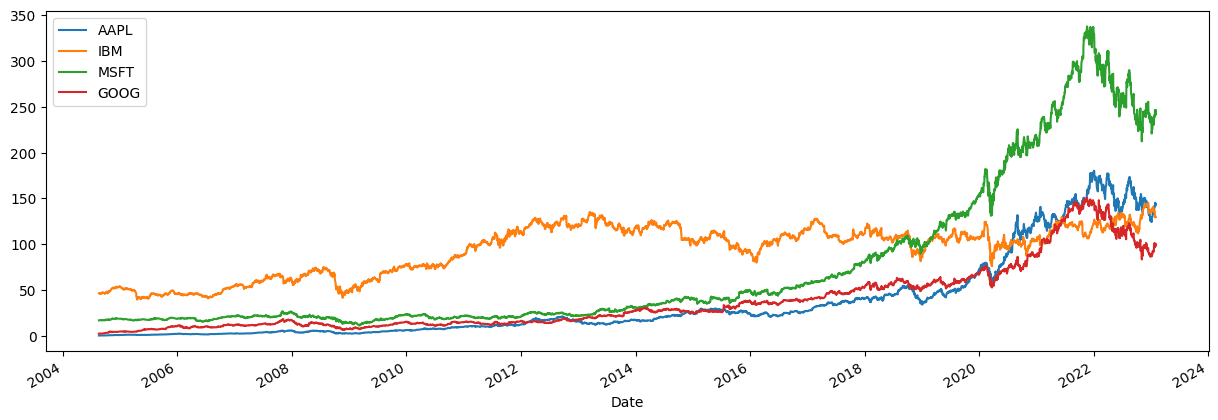

In [110]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

In stock-markets, often one is interested in the _percent changes of the prices_
* % change from previous value

Let us compute it
- Actually, __let us ask Pandas to compute it__ for us!
- Method `pct_change()` does precisely this
  - Computes the percentage change from the immediately previous row by default. 
  - This is useful in comparing the percentage of change in a time series of elements.

In [111]:
returns = price.pct_change() 
returns.head()

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-19       NaN       NaN       NaN       NaN
2004-08-20  0.002930  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004424  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011380  0.010775

In [112]:
returns.dropna(inplace=True)
returns

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20  0.002930  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004424  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011380  0.010775
2004-08-26  0.048714 -0.004467 -0.003993  0.018019
...              ...       ...       ...       ...
2023-01-25 -0.004701 -0.005159 -0.005908 -0.024997
2023-01-26  0.014803 -0.044828  0.030714  0.025121
2023-01-27  0.013684 -0.000446  0.000645  0.015631
2023-01-30 -0.020078  0.006771 -0.021962 -0.027405
2023-01-31  0.009021 -0.004213  0.021013  0.019602

[4644 rows x 4 columns]

<Axes: xlabel='Date'>

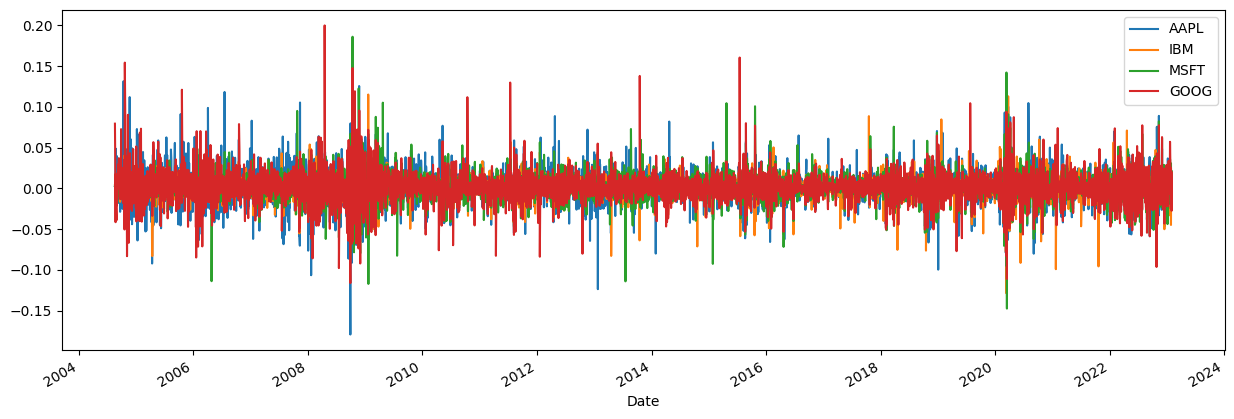

In [113]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [114]:
returns_smooth=returns.rolling(15).mean()
returns_smooth
#returns_smooth.head(16)

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20       NaN       NaN       NaN       NaN
2004-08-23       NaN       NaN       NaN       NaN
2004-08-24       NaN       NaN       NaN       NaN
2004-08-25       NaN       NaN       NaN       NaN
2004-08-26       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2023-01-25  0.008506 -0.000313  0.000494  0.005274
2023-01-26  0.008806 -0.003796  0.005458  0.007685
2023-01-27  0.010425 -0.003129  0.007477  0.010185
2023-01-30  0.006633 -0.003902  0.005227  0.007290
2023-01-31  0.006962 -0.004113  0.005979  0.008112

[4644 rows x 4 columns]

In this case
- It makes sense to drop the NA rows...

In [115]:
returns_smooth.dropna(inplace=True)
returns_smooth

AAPL       IBM      MSFT      GOOG
Date                                              
2004-09-10  0.010591  0.001467  0.001126  0.003639
2004-09-13  0.009876  0.000977  0.000347 -0.000283
2004-09-14  0.009082  0.001623  0.000517  0.001520
2004-09-15  0.006671  0.001307 -0.000090  0.004586
2004-09-16  0.006554  0.000831 -0.000677  0.005040
...              ...       ...       ...       ...
2023-01-25  0.008506 -0.000313  0.000494  0.005274
2023-01-26  0.008806 -0.003796  0.005458  0.007685
2023-01-27  0.010425 -0.003129  0.007477  0.010185
2023-01-30  0.006633 -0.003902  0.005227  0.007290
2023-01-31  0.006962 -0.004113  0.005979  0.008112

[4630 rows x 4 columns]

<Axes: xlabel='Date'>

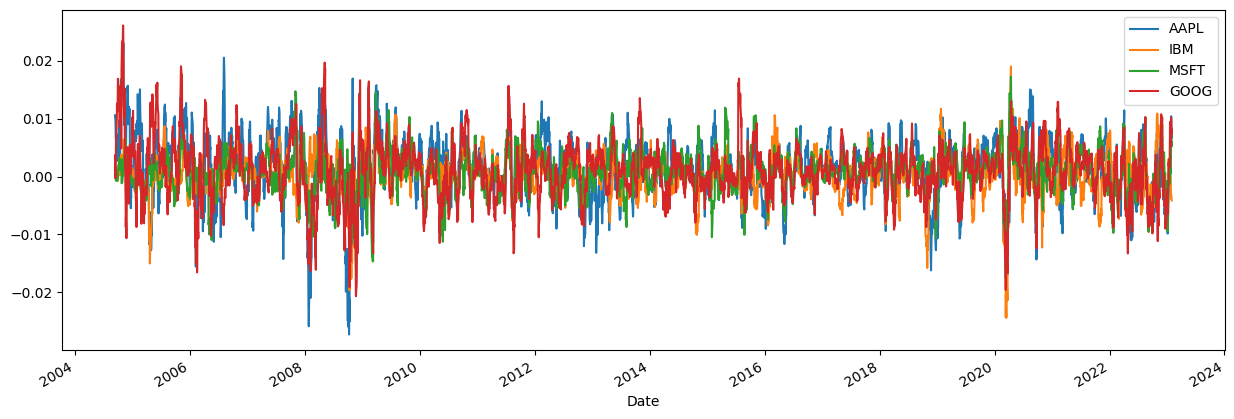

In [116]:
returns_smooth.plot(figsize=(15,5))

## Are there any correlations among these companies?

DataFrames offer two methods for computing 
* the __correlation__ among the elements in the DataFrame (`corr`)
* the __covariance__ matrix of the DataFrame (`cov`)

In [117]:
returns

AAPL       IBM      MSFT      GOOG
Date                                              
2004-08-20  0.002930  0.004241  0.002950  0.079430
2004-08-23  0.009091 -0.007038  0.004424  0.010064
2004-08-24  0.027993  0.000709  0.000000 -0.041408
2004-08-25  0.034429  0.004250  0.011380  0.010775
2004-08-26  0.048714 -0.004467 -0.003993  0.018019
...              ...       ...       ...       ...
2023-01-25 -0.004701 -0.005159 -0.005908 -0.024997
2023-01-26  0.014803 -0.044828  0.030714  0.025121
2023-01-27  0.013684 -0.000446  0.000645  0.015631
2023-01-30 -0.020078  0.006771 -0.021962 -0.027405
2023-01-31  0.009021 -0.004213  0.021013  0.019602

[4644 rows x 4 columns]

In [118]:
returns.corr()

AAPL       IBM      MSFT      GOOG
AAPL  1.000000  0.434029  0.523865  0.520624
IBM   0.434029  1.000000  0.506460  0.405833
MSFT  0.523865  0.506460  1.000000  0.565371
GOOG  0.520624  0.405833  0.565371  1.000000

In [119]:
returns.corr().style.background_gradient(cmap='Reds')

In [120]:
returns.cov()

AAPL       IBM      MSFT      GOOG
AAPL  0.000440  0.000132  0.000190  0.000212
IBM   0.000132  0.000209  0.000126  0.000114
MSFT  0.000190  0.000126  0.000298  0.000189
GOOG  0.000212  0.000114  0.000189  0.000376

In [121]:
returns.cov().style.background_gradient(cmap='Reds')

## What about risk?

__Please, forgive my ignorance :D__

For each company, we can calculate:
- the mean of the returns
- the standard deviation of the returns

These statistics are very important for investors:
- Mean returns give us an understanding of the profitability of an investment
- The standard deviation measures how much the returns fluctuate. 
  - We call this __risk__. 

> Typically __higher risks are associated with higher returns__. 
> - Which company has highest returns?
> - Which company has highest risk?

In [122]:
print("The maximum mean is in:",returns.mean().idxmax() )
print("The maximum standard deviation is in:",returns.std().idxmax())

The maximum mean is in: AAPL
The maximum standard deviation is in: AAPL


In [123]:
returns.mean()

AAPL    0.001455
IBM     0.000326
MSFT    0.000724
GOOG    0.000981
dtype: float64

In [124]:
returns.std()

AAPL    0.020984
IBM     0.014450
MSFT    0.017252
GOOG    0.019384
dtype: float64

In [3]:
returns.describe()

NameError: name 'returns' is not defined

In [126]:
returns.describe().loc['mean':'std']

AAPL       IBM      MSFT      GOOG
mean  0.001455  0.000326  0.000724  0.000981
std   0.020984  0.014450  0.017252  0.019384

## Interested in playing more with this case study?

https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Ftowardsdatascience.com%2Fanalyzing-financial-data-in-python-ccf5c99f55e8%3Fgi%3D7a3fb215ea05

> A few things changes in the library after the post has been written
> - Adapt our code to download new financial data
> - The webpage contains material on __risk analysis!__

How to download all data about a company without specific time periods?

In [127]:
web.get_data_yahoo('IBM')

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
1962-01-02    7.374124    7.374124    7.291268    7.291268    1.573411   
1962-01-03    7.291268    7.355003    7.291268    7.355003    1.587164   
1962-01-04    7.355003    7.355003    7.278521    7.281708    1.571347   
1962-01-05    7.272148    7.272148    7.125558    7.138305    1.540401   
1962-01-08    7.131931    7.131931    6.947100    7.004461    1.511519   
...                ...         ...         ...         ...         ...   
2023-10-12  142.509995  142.929993  140.949997  141.240005  141.240005   
2023-10-13  139.770004  140.119995  138.270004  138.460007  138.460007   
2023-10-16  139.279999  139.779999  138.520004  139.210007  139.210007   
2023-10-17  137.119995  140.619995  136.309998  140.320007  140.320007   
2023-10-18  137.119995  140.160004  139.809998  140.029999  140.029999   

             Volume  
Date                 
1962-01-02   407940  
1962-01-03   305955  
1962-01-04   274575  
1962-01-05   384405  
1962-01-08   572685  
...             ...  
2023-10-12  3921100  
2023-10-13  4582800  
2023-10-16  3361500  
2023-10-17  4168300  
2023-10-18   151631  

[15556 rows x 6 columns]

# More on plotting: More complex application to Italian COVID data
Pandas offers a number of plotting methods for DataFrame objects

In [99]:
#%pip install matplotlib

#import sys
#!"{sys.executable}" -m pip install matplotlib

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains trend data of the COVID'19 pandemic in Italy
- ‘dati-andamento-nazionale’ (national-level), 
- ‘dati-regioni’ (regional-level),
- ‘dati-province’ (province-level) 

In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

Let's load again the national-level COVID'19 data
- We set the date (`data`) as the index column
- We tell pandas to interpret such column as a datetime type

In [101]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2023-10-14T17:00:00   ITA                    3566                115   
2023-10-15T17:00:00   ITA                    3563                111   
2023-10-16T17:00:00   ITA                    3631                125   
2023-10-17T17:00:00   ITA                    3609                127   
2023-10-18T17:00:00   ITA                    3551                119   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2023-10-14T17:00:00                  3681                  163607   
2023-10-15T17:00:00                  3674                  163539   
2023-10-16T17:00:00                  3756                  161593   
2023-10-17T17:00:00                  3736                  160890   
2023-10-18T17:00:00                  3670                  160344   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2023-10-14T17:00:00           167288                         157   
2023-10-15T17:00:00           167213                         -75   
2023-10-16T17:00:00           165349                       -1864   
2023-10-17T17:00:00           164626                        -723   
2023-10-18T17:00:00           164014                        -612   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2023-10-14T17:00:00            4851         25825233    192098  ...   
2023-10-15T17:00:00            3153         25828446    192113  ...   
2023-10-16T17:00:00            2324         25832606    192141  ...   
2023-10-17T17:00:00            7577         25840862    192185  ...   
2023-10-18T17:00:00            4581         25846029    192210  ...   

                       tamponi  casi_testati  note  \
data                                                 
2023-10-14T17:00:00  276366648    69438850.0   NaN   
2023-10-15T17:00:00  276388163    69442117.0   NaN   
2023-10-16T17:00:00  276403605    69444712.0   NaN   
2023-10-17T17:00:00  276458853    69451092.0   NaN   
2023-10-18T17:00:00  276498458    69456321.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2023-10-14T17:00:00                         9.0        NaN       NaN   
2023-10-15T17:00:00                         5.0        NaN       NaN   
2023-10-16T17:00:00                        22.0        NaN       NaN   
2023-10-17T17:00:00                        22.0        NaN       NaN   
2023-10-18T17:00:00                         6.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2023-10-14T17:00:00                        9839634.0   
2023-10-15T17:00:00                        9840118.0   
2023-10-16T17:00:00                        9840513.0   
2023-10-17T17:00:00                        9841842.0   
2023-10-18T17:00:00                        9842522.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2023-10-14T17:00:00                              16344985.0   
2023-10-15T17:00:00                              16347654.0   
2023-10-16T17:00:00                              16349583.0   
2023-10-17T17:00:00                              16355831.0   
2023-10-18T17:00:00                              16359731.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2023-10-14T17:00:00              102351652.0                     174014996.0  
2023-10-15T17:00:00              102357407.0                     174030756.0  
2023-10-16T17:00:00  

Pandas considers the date as a string
- Let's tell to pands that it is a date
- This will allow us to reason in terms of time

In [102]:
covid_italy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 2020-02-24T18:00:00 to 2023-10-18T17:00:00
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   stato                                   1333 non-null   object 
 1   ricoverati_con_sintomi                  1333 non-null   int64  
 2   terapia_intensiva                       1333 non-null   int64  
 3   totale_ospedalizzati                    1333 non-null   int64  
 4   isolamento_domiciliare                  1333 non-null   int64  
 5   totale_positivi                         1333 non-null   int64  
 6   variazione_totale_positivi              1333 non-null   int64  
 7   nuovi_positivi                          1333 non-null   int64  
 8   dimessi_guariti                         1333 non-null   int64  
 9   deceduti                                1333 non-null   int64  
 10  casi_da_sospetto_diagnostico    

In [103]:
print(covid_italy.index)
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
#covid_italy.tail()
print()
print(covid_italy.index)

Index(['2020-02-24T18:00:00', '2020-02-25T18:00:00', '2020-02-26T18:00:00',
       '2020-02-27T18:00:00', '2020-02-28T18:00:00', '2020-02-29T18:00:00',
       '2020-03-01T18:00:00', '2020-03-02T18:00:00', '2020-03-03T18:00:00',
       '2020-03-04T18:00:00',
       ...
       '2023-10-09T17:00:00', '2023-10-10T17:00:00', '2023-10-11T17:00:00',
       '2023-10-12T17:00:00', '2023-10-13T17:00:00', '2023-10-14T17:00:00',
       '2023-10-15T17:00:00', '2023-10-16T17:00:00', '2023-10-17T17:00:00',
       '2023-10-18T17:00:00'],
      dtype='object', name='data', length=1333)

DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 18:00:00',
               '2020-03-01 18:00:00', '2020-03-02 18:00:00',
               '2020-03-03 18:00:00', '2020-03-04 18:00:00',
               ...
               '2023-10-09 17:00:00', '2023-10-10 17:00:00',
               '2023-10-11 17:00:00', 

Let us focucs only on
- currently infected (`totale_positivi`)
- overall recovered (`dimessi_guariti`)
- overall deceased (`deceduti`)

In [121]:
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti' ]]
covid_italy_filter

totale_positivi  dimessi_guariti  deceduti
data                                                           
2020-02-24 18:00:00              221                1         7
2020-02-25 18:00:00              311                1        10
2020-02-26 18:00:00              385                3        12
2020-02-27 18:00:00              588               45        17
2020-02-28 18:00:00              821               46        21
...                              ...              ...       ...
2023-10-14 17:00:00           167288         25825233    192098
2023-10-15 17:00:00           167213         25828446    192113
2023-10-16 17:00:00           165349         25832606    192141
2023-10-17 17:00:00           164626         25840862    192185
2023-10-18 17:00:00           164014         25846029    192210

[1333 rows x 3 columns]

During the peek in Spring 2020, the Italian government made a number of urgent decrees (links in Italian)
- Decree "Zone Rosse"
  - Some areas were classified as _red zones_, i.e. put in lockdown
- Decree ["Io resto a casa"](https://www.agenziacoesione.gov.it/news_istituzionali/emergenza-epidemiologica-covid-19-fine-al-25-marzo-stop-alle-attivita-commerciali-al-dettaglio-in-tutta-italia-dpcm-11-marzo-2020/)
  - Only the _necessary_ industrial and commercial production activities were left open nation-wide
  - Not movements outside the city of residence
- Decree ["Chiudi Italia"](http://www.governo.it/it/articolo/coronavirus-firmato-il-dpcm-22-marzo-2020/14363)
  - Hard lockdown nation-wide
- Decree ["Fase 2"](http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4763)
  - Partial re-opening
  
Let us look at **how were the numbers at that time**

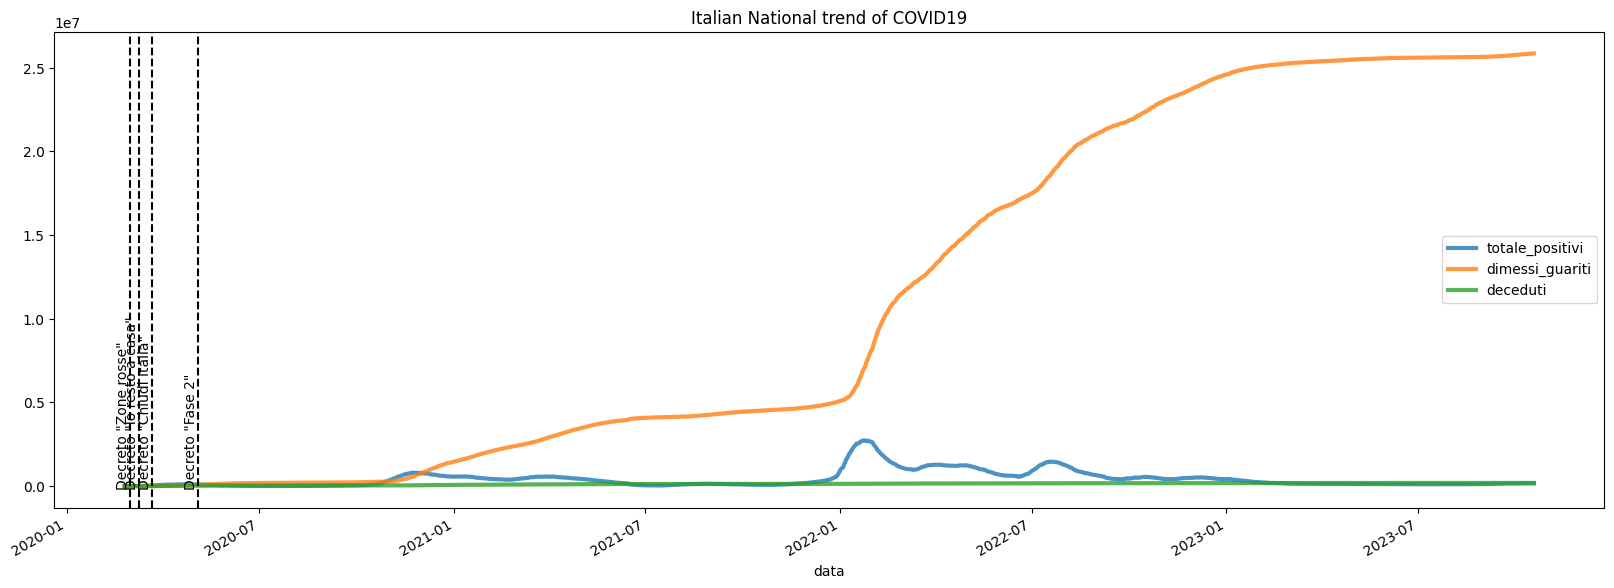

In [105]:
from datetime import datetime

# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

We have too many data points 
- making it difficult to focus on the 4 dates of interest

Let's hide some
- using `iloc` to consider the first 100 rows
- using `loc` to consider the rows with date before June
- using `drop` to drop the rows from June onward

But first, let's create a function to add annotations to the _current_ plot

In [106]:
def add_annotations():
    # and add annotations
    annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
                   datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
                   datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
                   datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
    for d,a in annotations.items():
        plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
        plt.axvline(d, color='k', linestyle='--')   

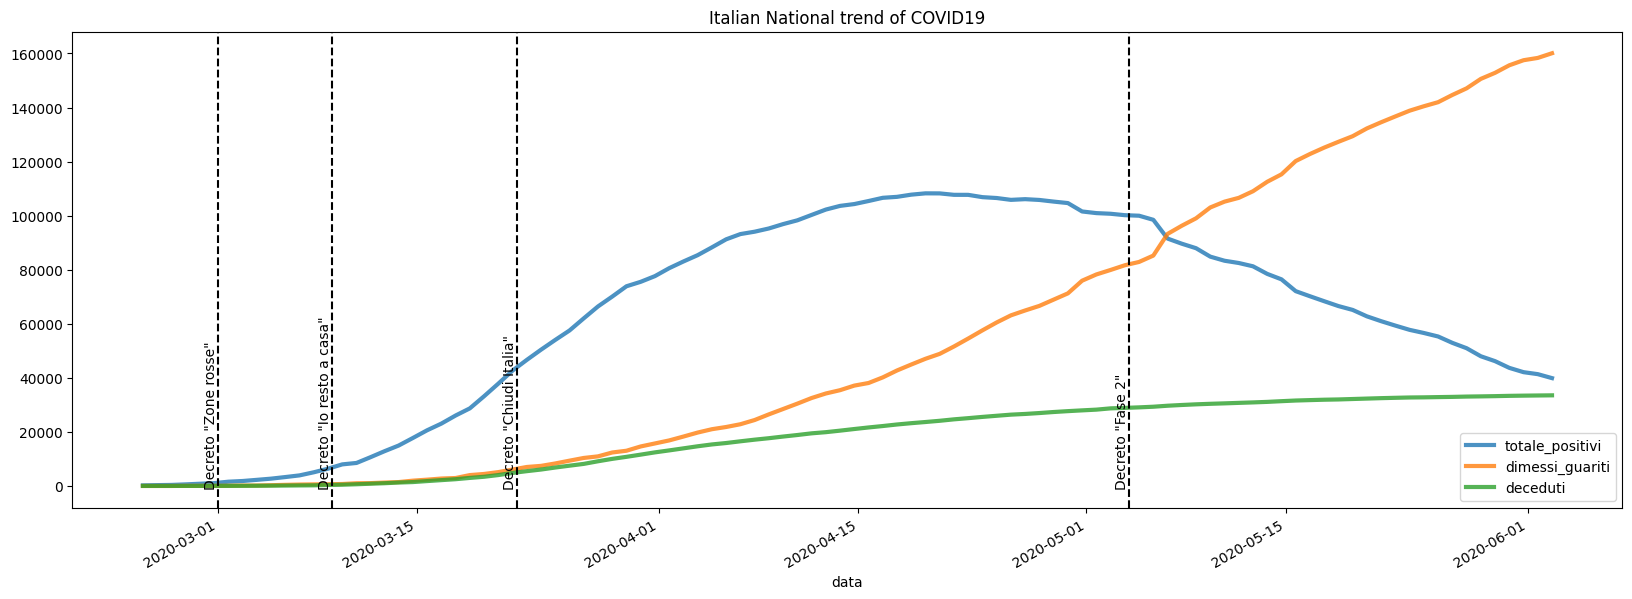

In [107]:
#Symbol \ allows to split a line in two
covid_italy_filter.iloc[:100].plot(figsize=(20, 7), linewidth=3, alpha=0.8, \
                                   title="Italian National trend of COVID19") 
add_annotations() 
plt.show()

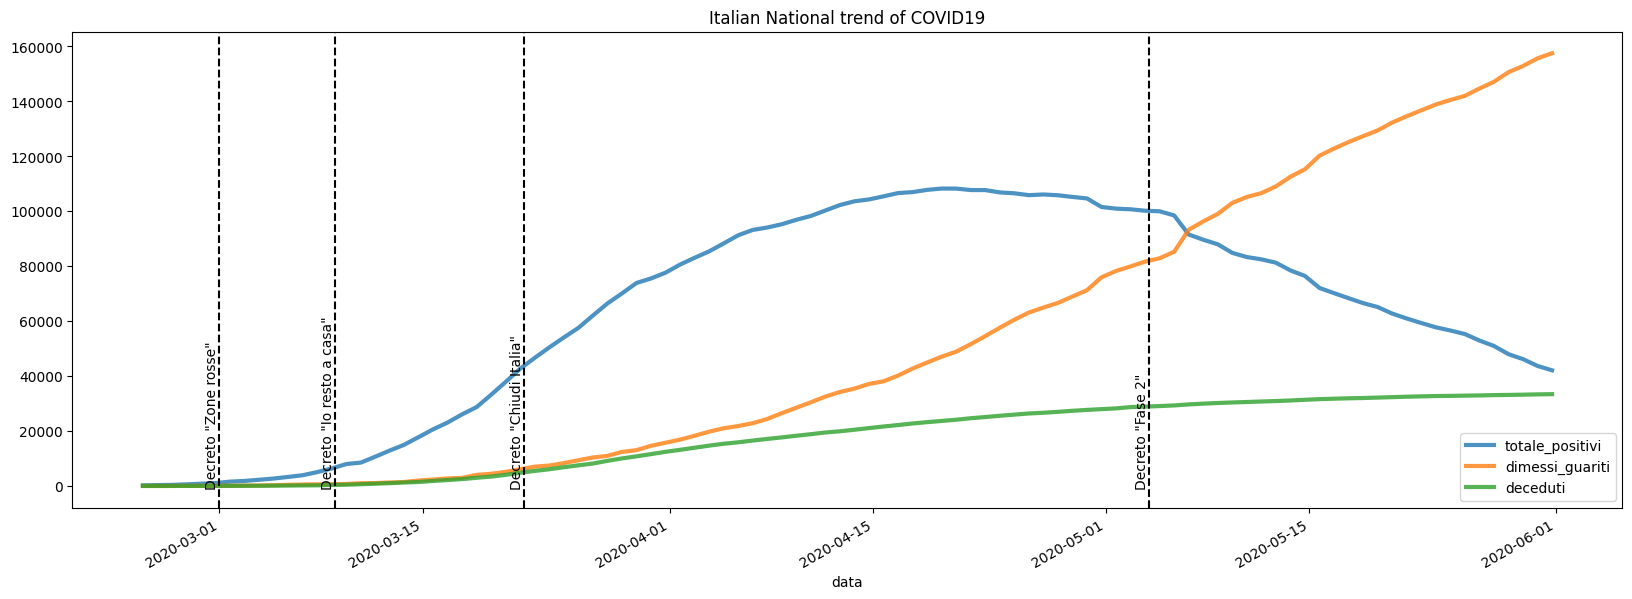

In [108]:
covid_italy_filter.loc[covid_italy_filter.index<= datetime(2020, 6, 1)].plot(figsize=(20, 7), \
    linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

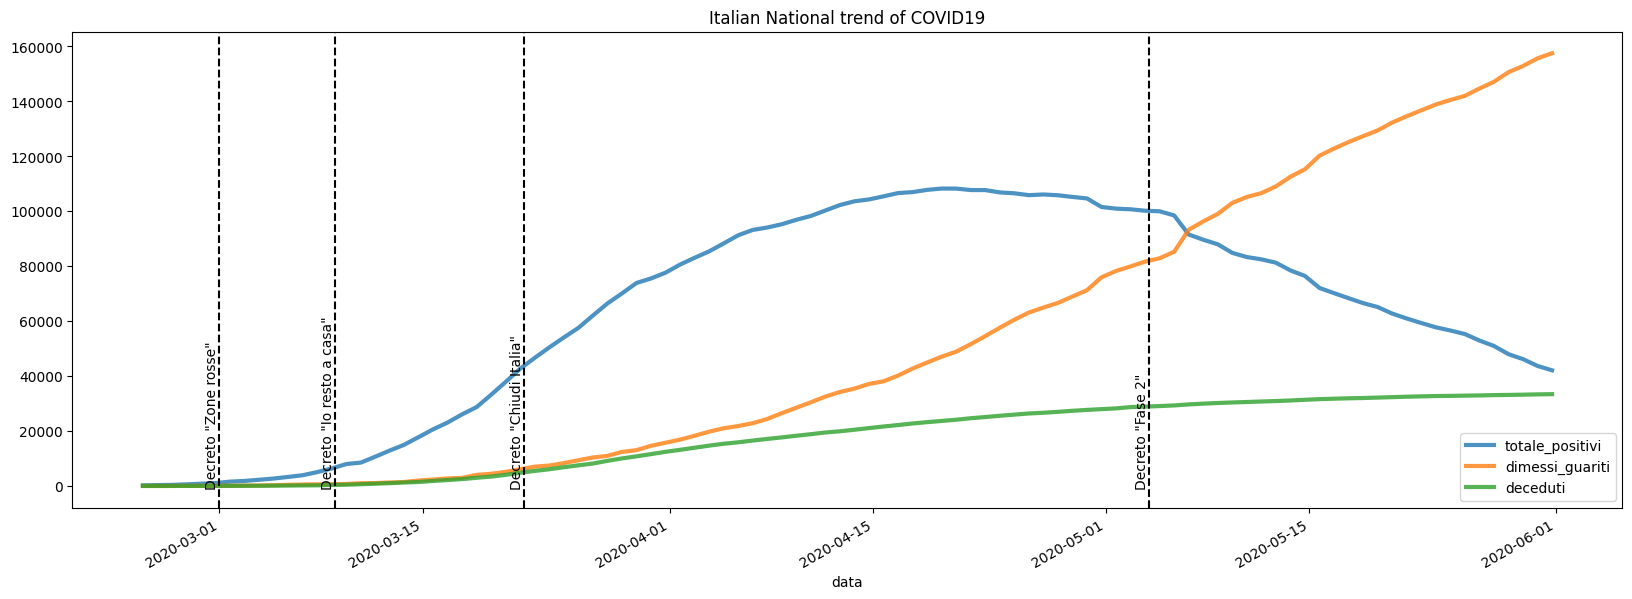

In [109]:
covid_italy_filter.drop(covid_italy_filter[covid_italy_filter.index > datetime(2020, 6, 1)].index).plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

What about recent months?

<Axes: title={'center': 'Since 2022'}, xlabel='data'>

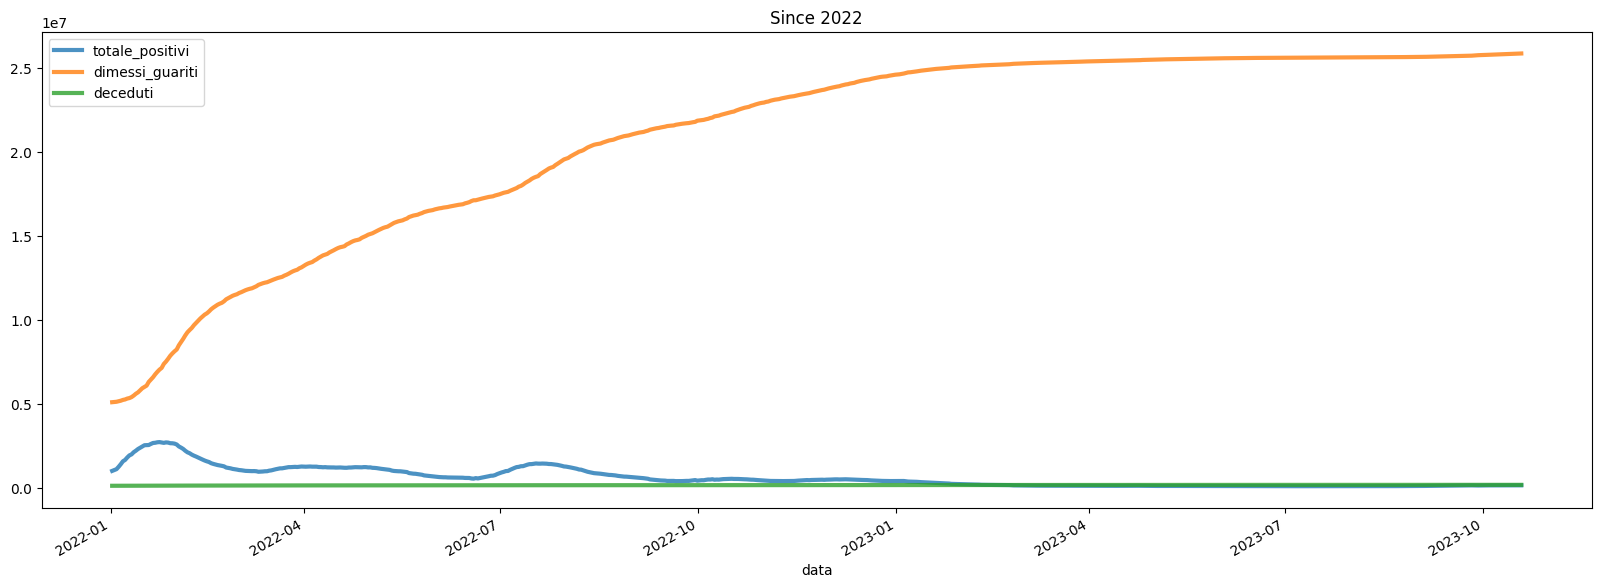

In [124]:
covid_italy_filter.loc[covid_italy_filter.index>= datetime(2022, 1, 1)].plot(figsize=(20, 7), \
                                                        linewidth=3, alpha=0.8, title="Since 2022") 



## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

<Axes: title={'center': ' Deceduti vs Positivi updated at 10/18/23'}, xlabel='regione'>

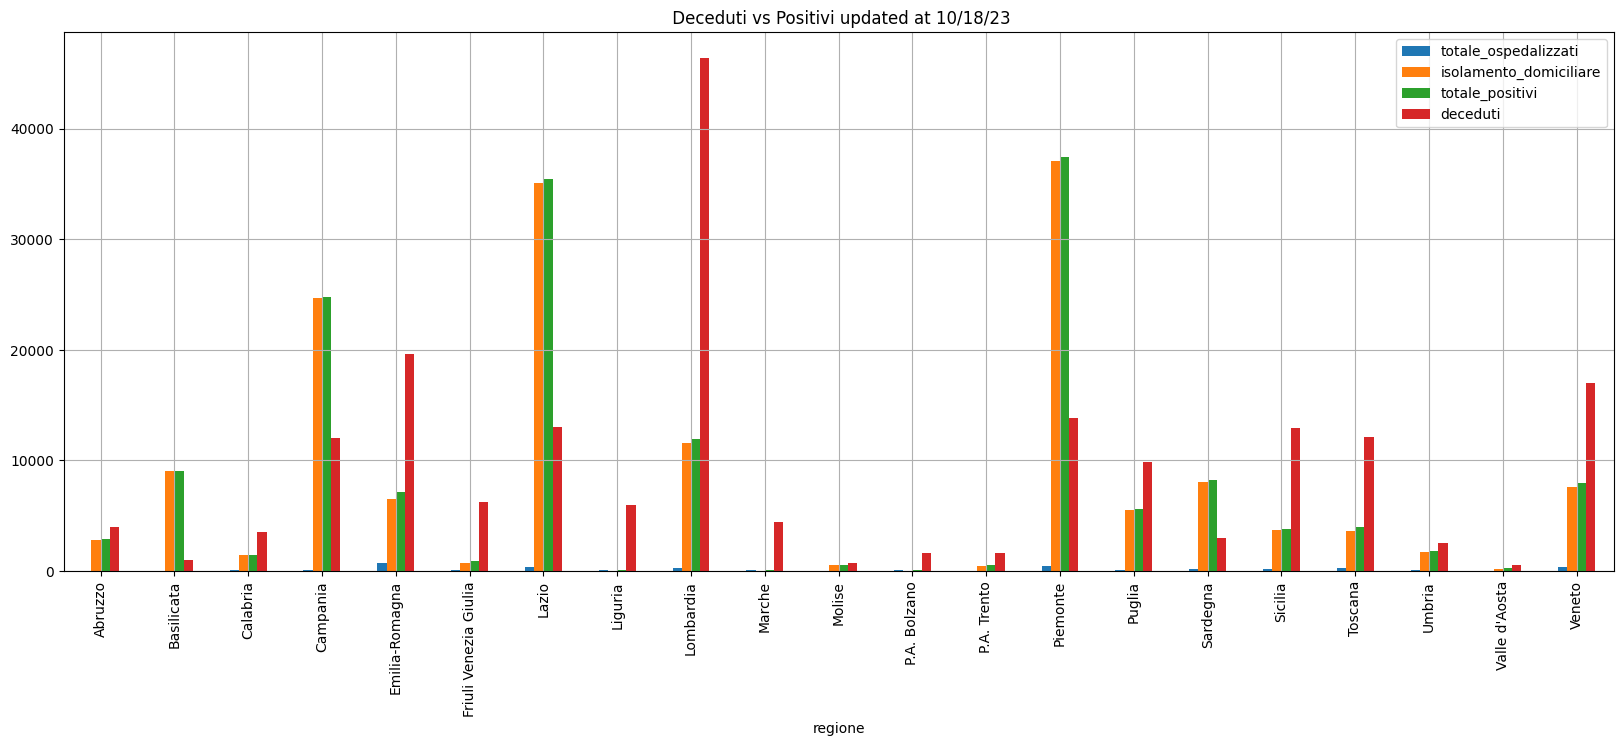

In [111]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione # set Region as index

#drop some unnecessary columns
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

#plt.show()

In [112]:
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']]

totale_ospedalizzati  isolamento_domiciliare  \
regione                                                               
Abruzzo                                  48                    2838   
Basilicata                               26                    9016   
Calabria                                 76                    1411   
Campania                                102                   24709   
Emilia-Romagna                          702                    6480   
Friuli Venezia Giulia                   136                     762   
Lazio                                   337                   35056   
Liguria                                 139                       0   
Lombardia                               324                   11578   
Marche                                   71                       0   
Molise                                    7                     583   
P.A. Bolzano                             62                       0   
P.A. Trento                              47                     490   
Piemonte                                425                   37025   
Puglia                                   82                    5486   
Sardegna                                156                    8033   
Sicilia                                 164                    3681   
Toscana                                 298                    3669   
Umbria                                  102                    1691   
Valle d'Aosta                            20                     221   
Veneto                                  346                    7615   

                       totale_positivi  deceduti  
regione                                           
Abruzzo                           2886      3997  
Basilicata                        9042      1045  
Calabria                          1487      3548  
Campania                         24811     12005  
Emilia-Romagna                    7182     19624  
Friuli Venezia Giulia              898      6235  
Lazio                            35393     13058  
Liguria                            139      5973  
Lombardia                        11902     46394  
Marche                              71      4473  
Molise                             590       752  
P.A. Bolzano                        62      1627  
P.A. Trento                        537      1658  
Piemonte                         37450     13879  
Puglia                            5568      9864  
Sardegna                          8189      2973  
Sicilia                           3845     12904  
Toscana                           3967     12098  
Umbria                            1793      2509  
Valle d'Aosta                      241       578  
Veneto                            7961     17016

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, 
- resulting in the value in each row being stacked together

Let's compare 'terapia_intensiva' and 'totale_ospedalizzati' on latest day

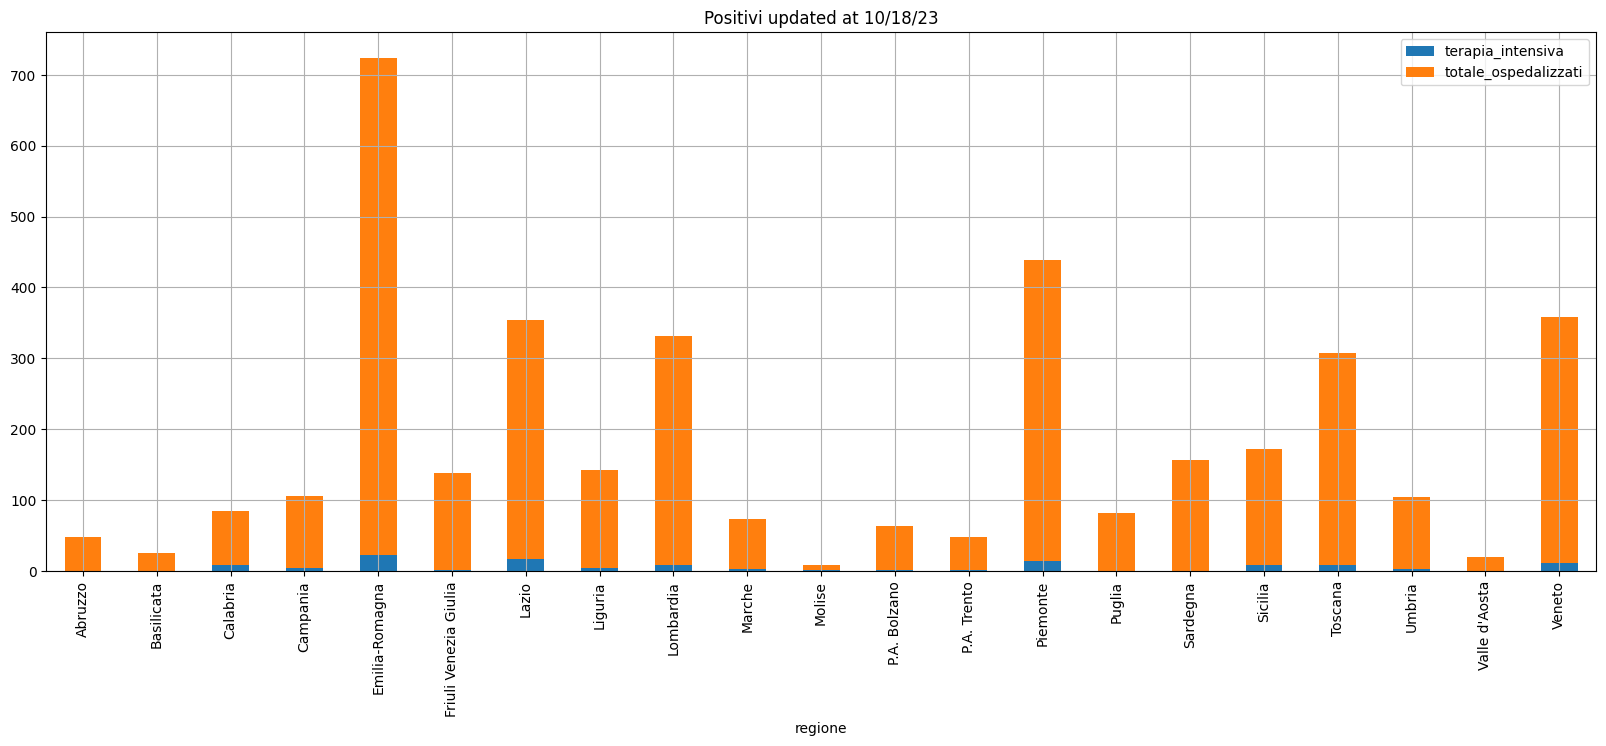

In [113]:
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)
plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch requires a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [114]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2023-10-14 17:00:00   ITA                    3566                115   
2023-10-15 17:00:00   ITA                    3563                111   
2023-10-16 17:00:00   ITA                    3631                125   
2023-10-17 17:00:00   ITA                    3609                127   
2023-10-18 17:00:00   ITA                    3551                119   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2023-10-14 17:00:00                  3681                  163607   
2023-10-15 17:00:00                  3674                  163539   
2023-10-16 17:00:00                  3756                  161593   
2023-10-17 17:00:00                  3736                  160890   
2023-10-18 17:00:00                  3670                  160344   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2023-10-14 17:00:00           167288                         157   
2023-10-15 17:00:00           167213                         -75   
2023-10-16 17:00:00           165349                       -1864   
2023-10-17 17:00:00           164626                        -723   
2023-10-18 17:00:00           164014                        -612   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2023-10-14 17:00:00            4851         25825233    192098  ...   
2023-10-15 17:00:00            3153         25828446    192113  ...   
2023-10-16 17:00:00            2324         25832606    192141  ...   
2023-10-17 17:00:00            7577         25840862    192185  ...   
2023-10-18 17:00:00            4581         25846029    192210  ...   

                       tamponi  casi_testati  note  \
data                                                 
2023-10-14 17:00:00  276366648    69438850.0   NaN   
2023-10-15 17:00:00  276388163    69442117.0   NaN   
2023-10-16 17:00:00  276403605    69444712.0   NaN   
2023-10-17 17:00:00  276458853    69451092.0   NaN   
2023-10-18 17:00:00  276498458    69456321.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2023-10-14 17:00:00                         9.0        NaN       NaN   
2023-10-15 17:00:00                         5.0        NaN       NaN   
2023-10-16 17:00:00                        22.0        NaN       NaN   
2023-10-17 17:00:00                        22.0        NaN       NaN   
2023-10-18 17:00:00                         6.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2023-10-14 17:00:00                        9839634.0   
2023-10-15 17:00:00                        9840118.0   
2023-10-16 17:00:00                        9840513.0   
2023-10-17 17:00:00                        9841842.0   
2023-10-18 17:00:00                        9842522.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2023-10-14 17:00:00                              16344985.0   
2023-10-15 17:00:00                              16347654.0   
2023-10-16 17:00:00                              16349583.0   
2023-10-17 17:00:00                              16355831.0   
2023-10-18 17:00:00                              16359731.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2023-10-14 17:00:00              102351652.0                     174014996.0  
2023-10-15 17:00:00              102357407.0                     174030756.0  
2023-10-16 17:00:00  

In [115]:
#drop unnecessary columns
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)

In [116]:
covid_italy['totale_casi']

data
2020-02-24 18:00:00         229
2020-02-25 18:00:00         322
2020-02-26 18:00:00         400
2020-02-27 18:00:00         650
2020-02-28 18:00:00         888
                         ...   
2023-10-14 17:00:00    26184619
2023-10-15 17:00:00    26187772
2023-10-16 17:00:00    26190096
2023-10-17 17:00:00    26197673
2023-10-18 17:00:00    26202253
Name: totale_casi, Length: 1333, dtype: int64

In [117]:
covid_italy['terapia_intensiva']

data
2020-02-24 18:00:00     26
2020-02-25 18:00:00     35
2020-02-26 18:00:00     36
2020-02-27 18:00:00     56
2020-02-28 18:00:00     64
                      ... 
2023-10-14 17:00:00    115
2023-10-15 17:00:00    111
2023-10-16 17:00:00    125
2023-10-17 17:00:00    127
2023-10-18 17:00:00    119
Name: terapia_intensiva, Length: 1333, dtype: int64

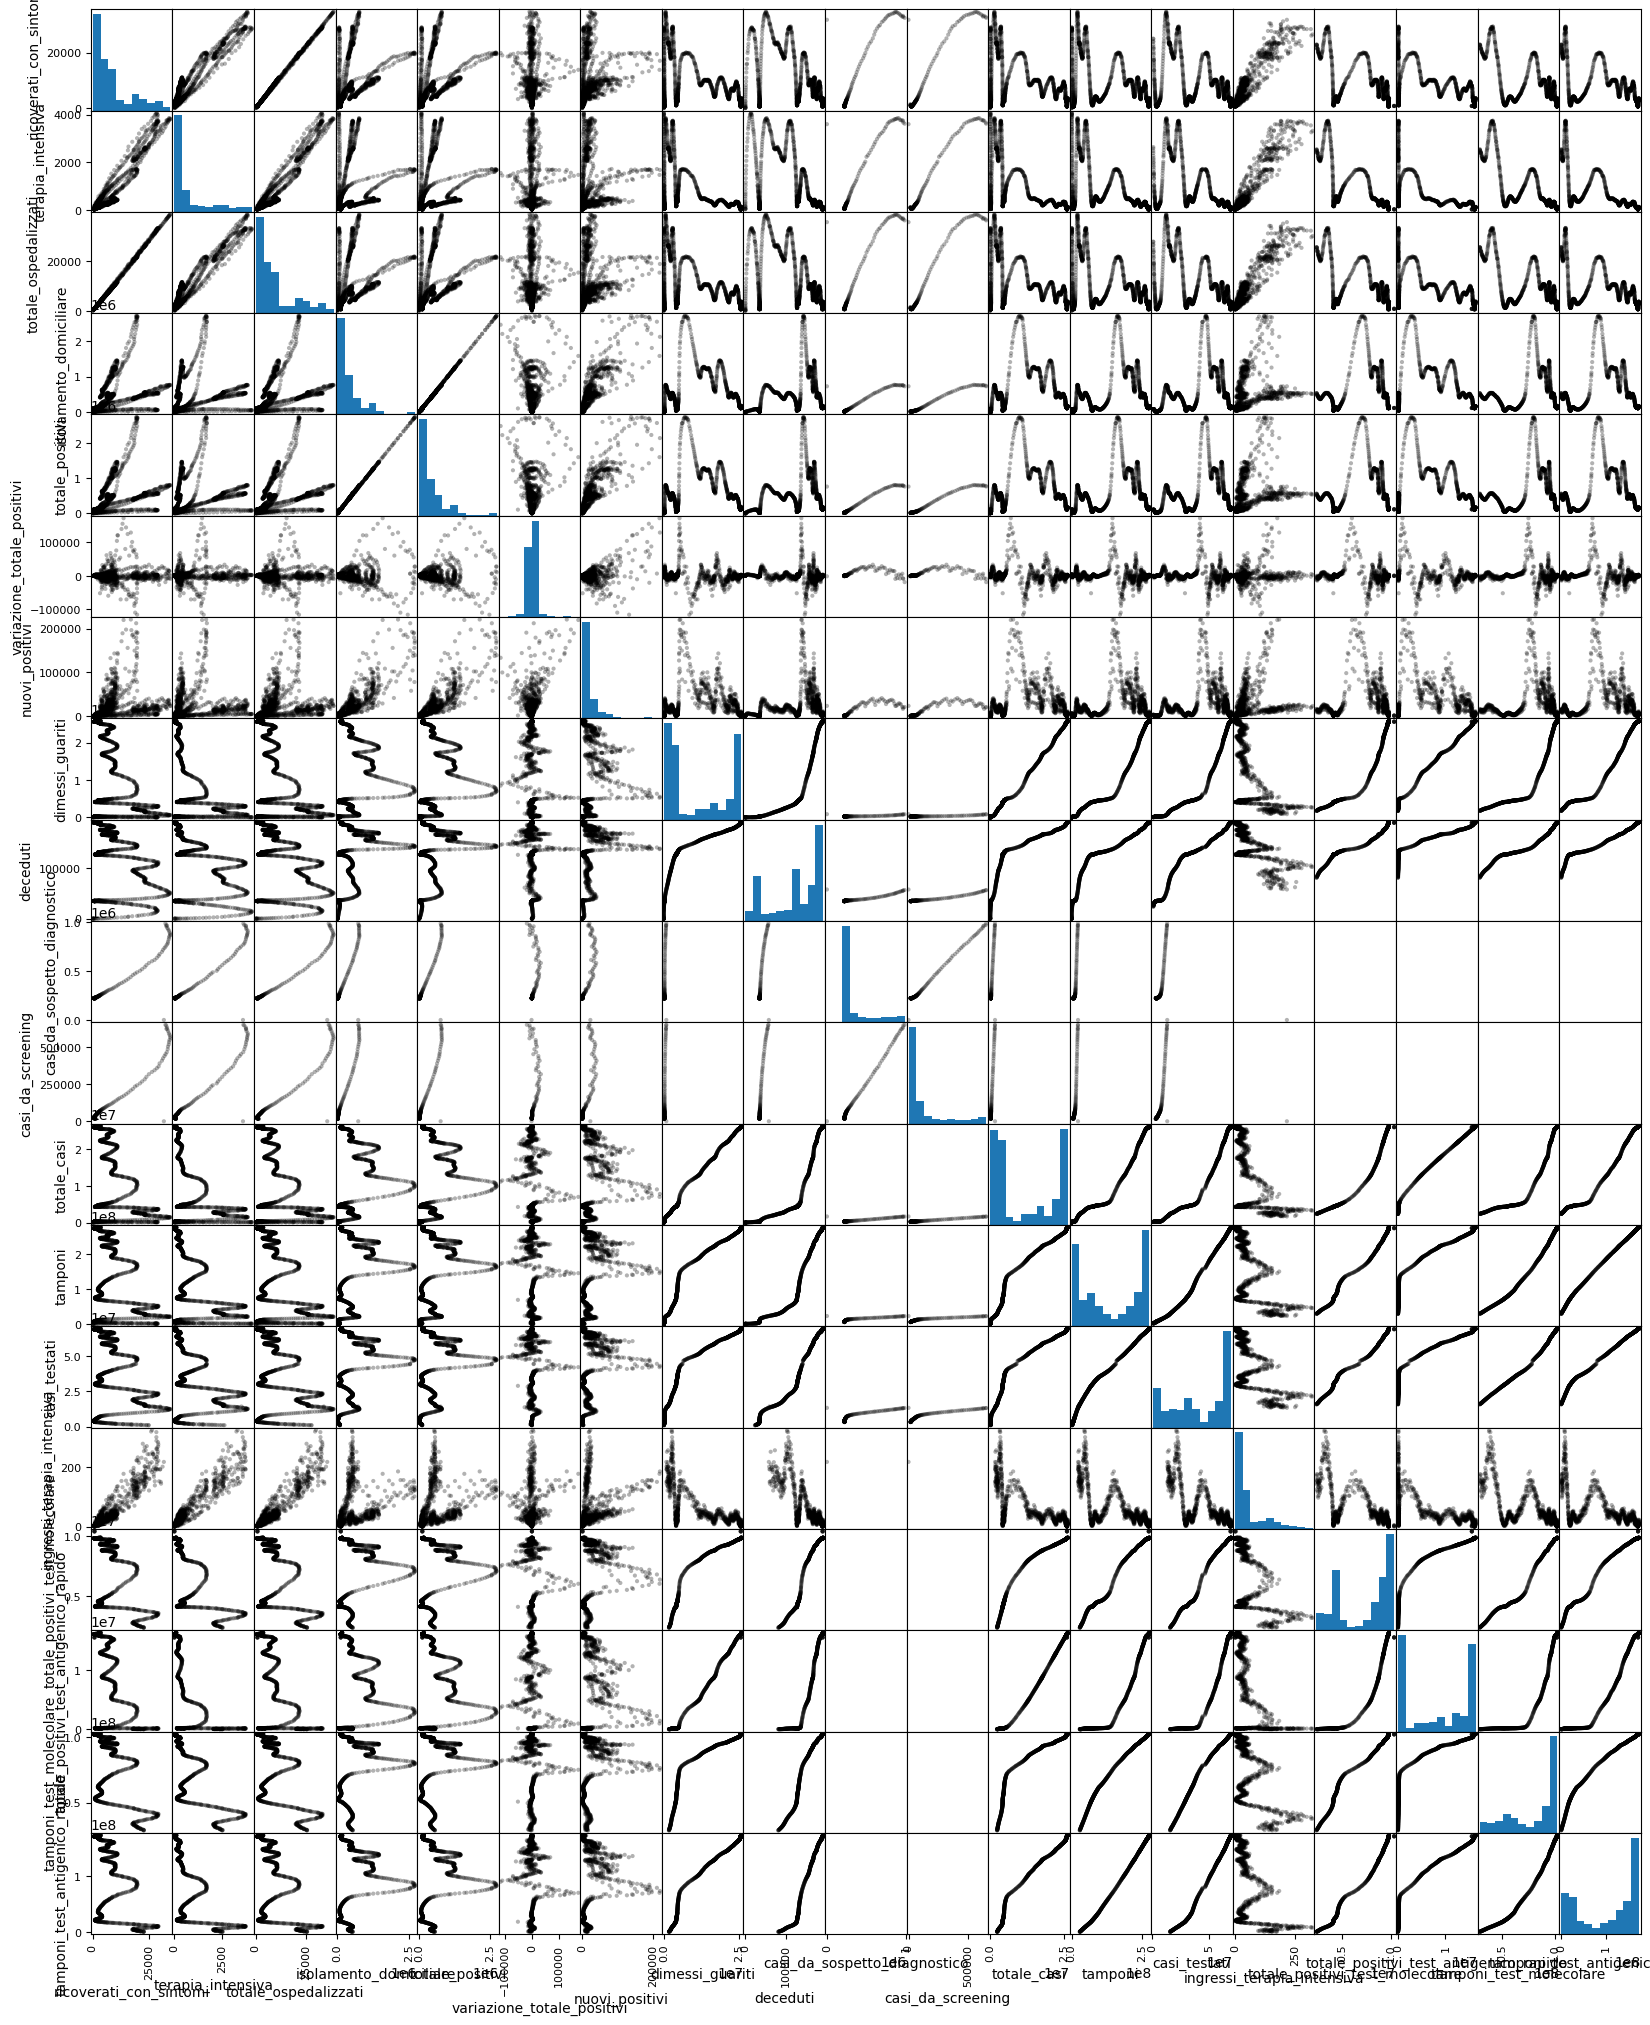

In [118]:
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

Too much data here!
- let's remove some more mostly empty rows

In [119]:
covid_italy[["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido",\
             "tamponi_test_molecolare","tamponi_test_antigenico_rapido"]]

totale_positivi_test_molecolare  \
data                                                   
2020-02-24 18:00:00                              NaN   
2020-02-25 18:00:00                              NaN   
2020-02-26 18:00:00                              NaN   
2020-02-27 18:00:00                              NaN   
2020-02-28 18:00:00                              NaN   
...                                              ...   
2023-10-14 17:00:00                        9839634.0   
2023-10-15 17:00:00                        9840118.0   
2023-10-16 17:00:00                        9840513.0   
2023-10-17 17:00:00                        9841842.0   
2023-10-18 17:00:00                        9842522.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2020-02-24 18:00:00                                     NaN   
2020-02-25 18:00:00                                     NaN   
2020-02-26 18:00:00                                     NaN   
2020-02-27 18:00:00                                     NaN   
2020-02-28 18:00:00                                     NaN   
...                                                     ...   
2023-10-14 17:00:00                              16344985.0   
2023-10-15 17:00:00                              16347654.0   
2023-10-16 17:00:00                              16349583.0   
2023-10-17 17:00:00                              16355831.0   
2023-10-18 17:00:00                              16359731.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2020-02-24 18:00:00                      NaN                             NaN  
2020-02-25 18:00:00                      NaN                             NaN  
2020-02-26 18:00:00                      NaN                             NaN  
2020-02-27 18:00:00                      NaN                             NaN  
2020-02-28 18:00:00                      NaN                             NaN  
...                                      ...                             ...  
2023-10-14 17:00:00              102351652.0                     174014996.0  
2023-10-15 17:00:00              102357407.0                     174030756.0  
2023-10-16 17:00:00              102358981.0                     174044624.0  
2023-10-17 17:00:00              102364924.0                     174093929.0  
2023-10-18 17:00:00              102370718.0                     174127740.0  

[1333 rows x 4 columns]

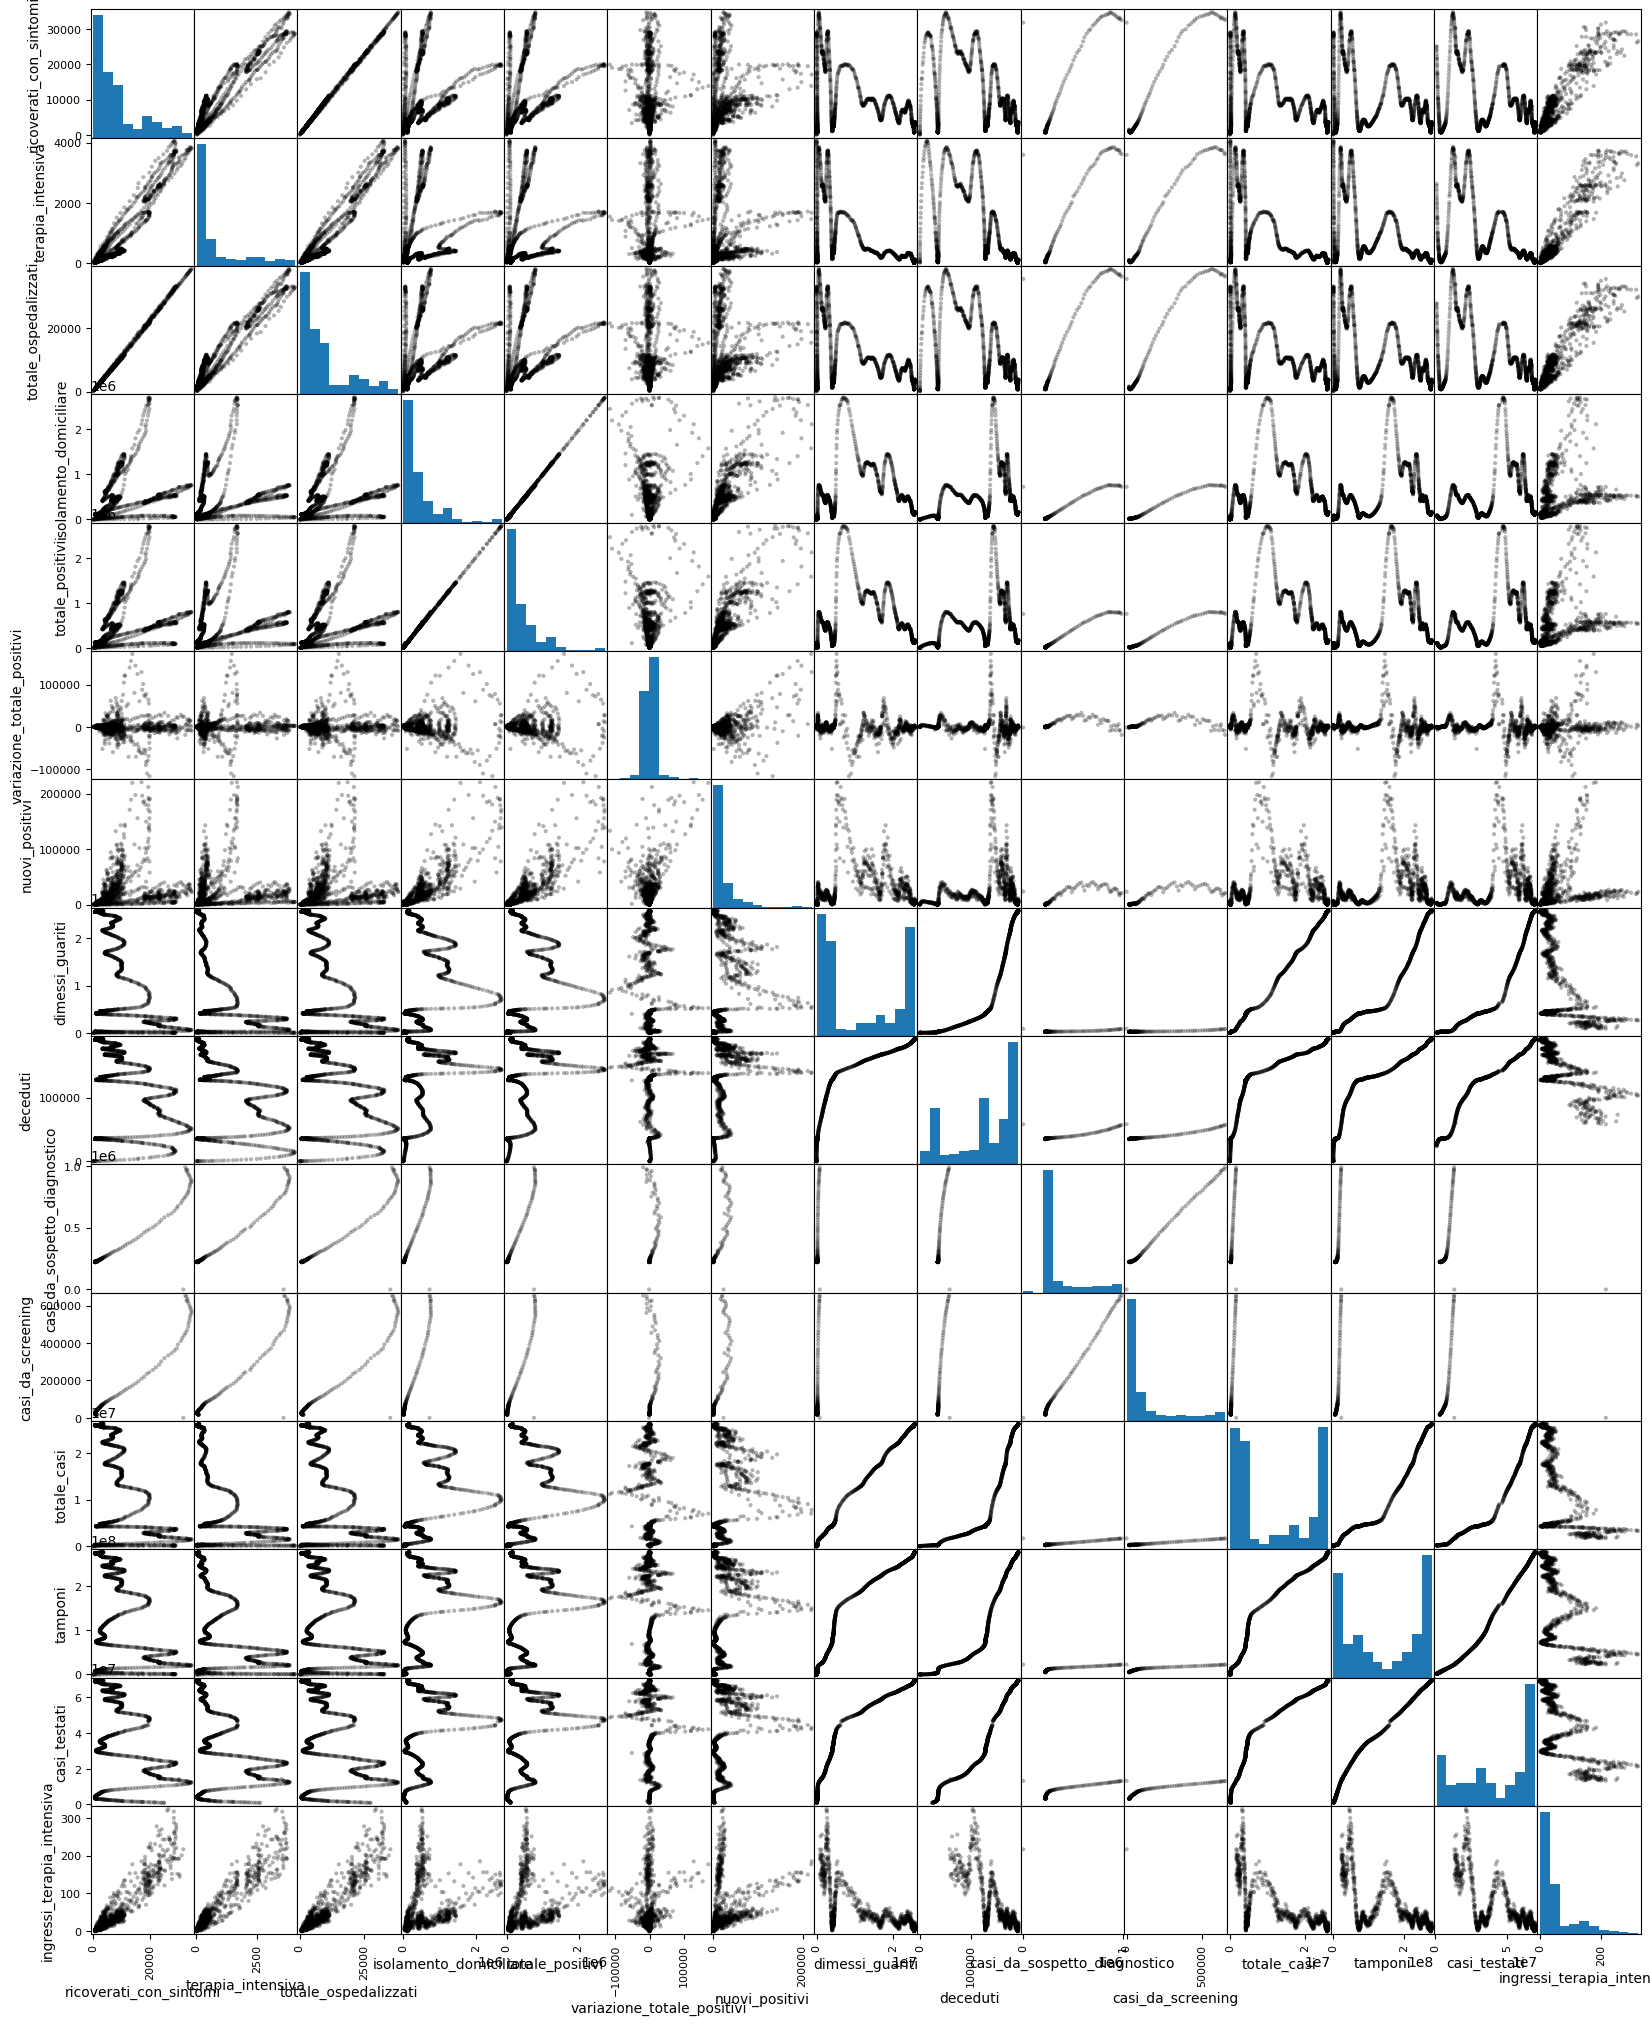

In [120]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()